In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### flip dec and random coor

#### data

In [4]:
tsl3 = pd.read_csv('CentralDogma/2_Lust_/list3v2_ra_dec.csv')
tsl3['DEC'] = -tsl3['DEC']
tsl3.to_csv('CentralDogma/2_Lust_/list3v2_decFlip.csv', index=False)

In [6]:
mock_ra = np.random.uniform(30, 50, 50000)
mock_dec = np.random.uniform(-20, 20, 50000)

tsl3_mock = pd.DataFrame({'RA': mock_ra, 'DEC': mock_dec})
tsl3_mock.to_csv('CentralDogma/2_Lust_/list3v2_mock.csv', index=False)

#### crossmatch

In [2]:
tsl_2mass = pd.read_csv('CentralDogma/2_Lust_/3-2MASSv2.csv')
tsl_allwise = pd.read_csv('CentralDogma/2_Lust_/3-ALLWISEv2.csv')
tsl_nomad = pd.read_csv('CentralDogma/2_Lust_/3-NOMADv2.csv')
tsl_dF_2mass = pd.read_csv('CentralDogma/2_Lust_/list3v2_decFlip-2MASS.csv')
tsl_dF_allwise = pd.read_csv('CentralDogma/2_Lust_/list3v2_decFlip-ALLWISE.csv')
tsl_dF_nomad = pd.read_csv('CentralDogma/2_Lust_/list3v2_decFlip-NOMAD.csv')
tsl_mo_2mass = pd.read_csv('CentralDogma/2_Lust_/list3v2_mock-2MASS.csv')
tsl_mo_allwise = pd.read_csv('CentralDogma/2_Lust_/list3v2_mock-ALLWISE.csv')
tsl_mo_nomad = pd.read_csv('CentralDogma/2_Lust_/list3v2_mock-NOMAD.csv')

bsc_nog_2mass = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_2MASS.csv')
bsc_nog_allwise = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_ALLWISE.csv')
bsc_nog_nomad = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_NOMAD.csv')

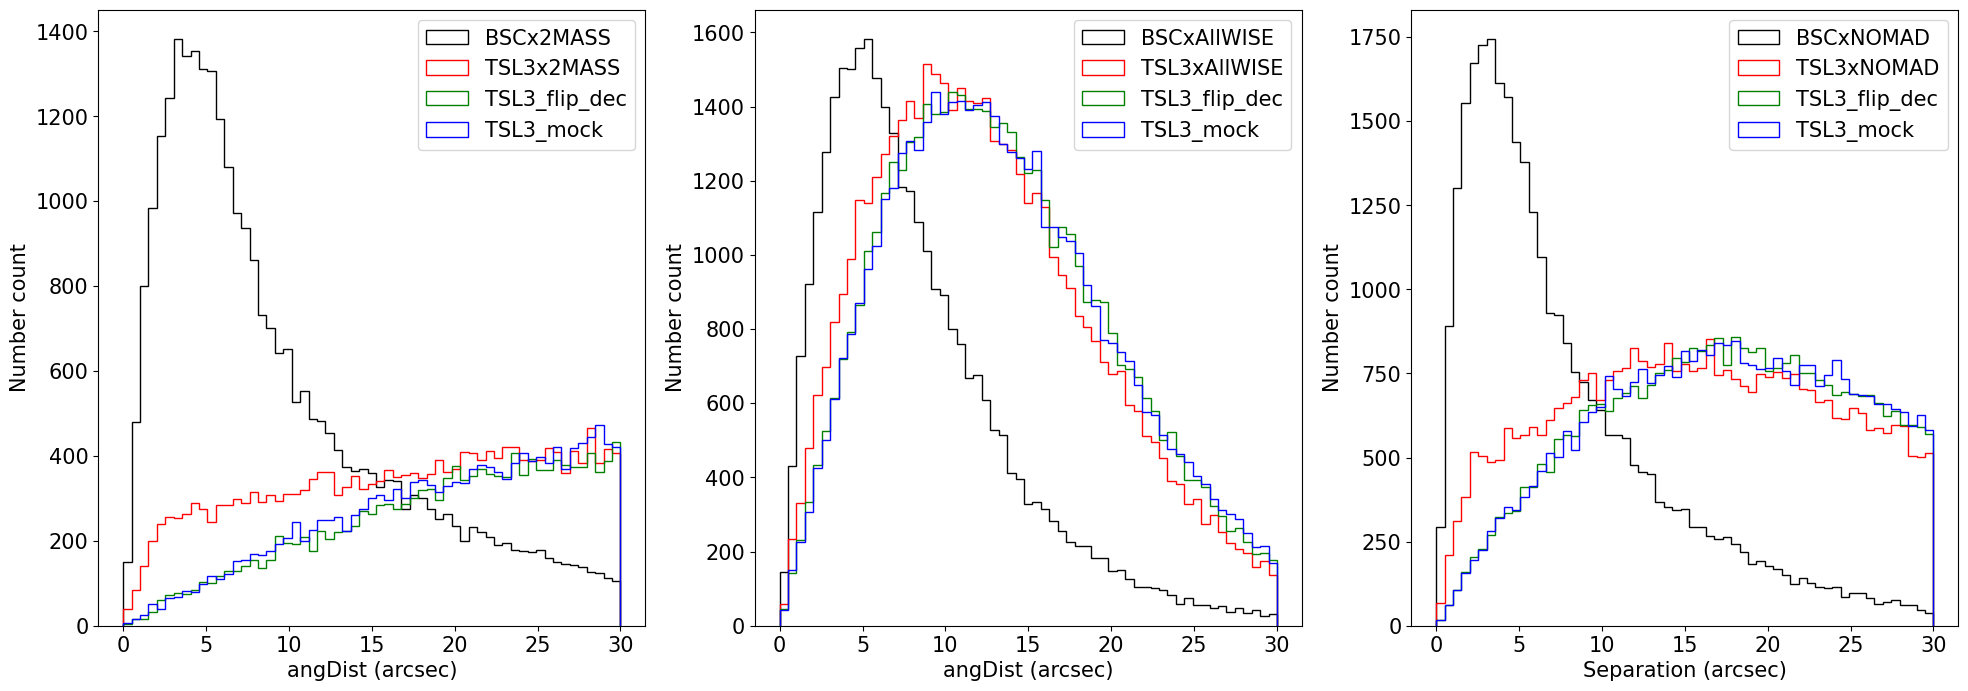

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

bins = np.linspace(0, 30, 60)

ax = axs[0]
ax.hist(bsc_nog_2mass['angDist'], bins=bins, histtype='step', label='BSCx2MASS', color='k')
ax.hist(tsl_2mass['angDist'], bins=bins, histtype='step', label='TSL3x2MASS', color='r')
ax.hist(tsl_dF_2mass['angDist'], bins=bins, histtype='step', label='TSL3_flip_dec', color='g')
ax.hist(tsl_mo_2mass['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b')
# ax.hist(tslbr_2mass.loc[tslbr_2mass['Jmag']>13, 'angDist'], bins=bins, histtype='step', label='TSL3_brx2MASS', color='b')

ax.legend(fontsize=15)

ax.set_xlabel('angDist (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = axs[1]
ax.hist(bsc_nog_allwise['angDist'], bins=bins, histtype='step', label='BSCxAllWISE', color='k')
ax.hist(tsl_allwise['angDist'], bins=bins, histtype='step', label='TSL3xAllWISE', color='r')
ax.hist(tsl_dF_allwise['angDist'], bins=bins, histtype='step', label='TSL3_flip_dec', color='g')
ax.hist(tsl_mo_allwise['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b')


ax.legend(fontsize=15)
ax.set_xlabel('angDist (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)


ax = axs[2]
ax.hist(bsc_nog_nomad['angDist'], bins=bins, histtype='step', label='BSCxNOMAD', color='k')
ax.hist(tsl_nomad['angDist'], bins=bins, histtype='step', label='TSL3xNOMAD', color='r')
ax.hist(tsl_dF_nomad['angDist'], bins=bins, histtype='step', label='TSL3_flip_dec', color='g')
ax.hist(tsl_mo_nomad['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b')


ax.legend(fontsize=15)
ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# title

plt.show()

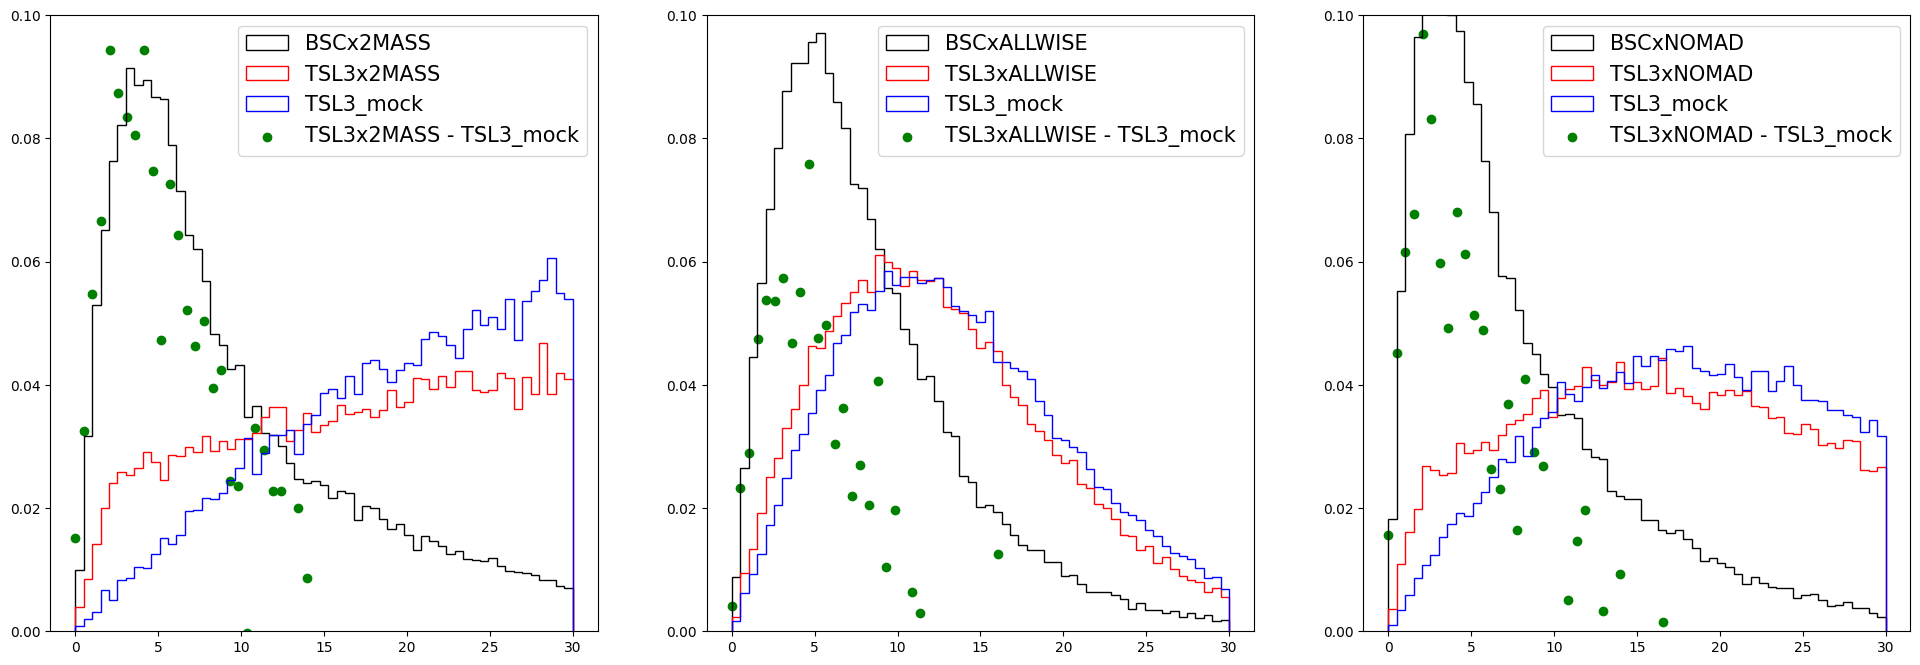

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

bins = np.linspace(0, 30, 60)
x = np.linspace(0, 30, 59)

ax = axs[0]
ax.hist(bsc_nog_2mass['angDist'], bins=bins, histtype='step', label='BSCx2MASS', color='k', density=True)
a = ax.hist(tsl_2mass['angDist'], bins=bins, histtype='step', label='TSL3x2MASS', color='r', density=True)
b = ax.hist(tsl_mo_2mass['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=True)
ax.scatter(x, (a[0]-b[0])*5, color='g', label='TSL3x2MASS - TSL3_mock')
ax.set_ylim(0, 0.1)
ax.legend(fontsize=15)

ax = axs[1]
ax.hist(bsc_nog_allwise['angDist'], bins=bins, histtype='step', label='BSCxALLWISE', color='k', density=True)
c = ax.hist(tsl_allwise['angDist'], bins=bins, histtype='step', label='TSL3xALLWISE', color='r', density=True)
d = ax.hist(tsl_mo_allwise['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=True)
ax.scatter(x, (c[0]-d[0])*7, color='g', label='TSL3xALLWISE - TSL3_mock')
ax.set_ylim(0, 0.1)
ax.legend(fontsize=15)

ax = axs[2]
ax.hist(bsc_nog_nomad['angDist'], bins=bins, histtype='step', label='BSCxNOMAD', color='k', density=True)
e = ax.hist(tsl_nomad['angDist'], bins=bins, histtype='step', label='TSL3xNOMAD', color='r', density=True)
f = ax.hist(tsl_mo_nomad['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=True)
ax.scatter(x, (e[0]-f[0])*6, color='g', label='TSL3xNOMAD - TSL3_mock')
ax.set_ylim(0, 0.1)
ax.legend(fontsize=15)

In [3]:

from scipy.interpolate import griddata
from lmfit.models import ExpressionModel
def CrossmatchDisfitv2(file1, file2, cname=['RAJ2000','DEJ2000'], cname0=['RA','DEC'], fitrange=30, grid=41, weight=1.1):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D radial Gaussian fitting result plot with file1-file2
    
    Parameters:
    file1: str, the file path of the crossmatch result
    file2: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    """

    if type(file1) == str:
        data1 = pd.read_csv(file1)
        data2 = pd.read_csv(file2)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x1 = (data1[cname0[0]]-data1[n1])*3600*np.cos(data1[cname0[1]]*np.pi/180)
    y1 = (data1[cname0[1]]-data1[n2])*3600
    
    x2 = (data2[cname0[0]]-data2[n1])*3600*np.cos(data2[cname0[1]]*np.pi/180)
    y2 = (data2[cname0[1]]-data2[n2])*3600
    
    xedges = yedges = np.linspace(-fitrange, fitrange, grid)
    H1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedges, yedges))
    H2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedges, yedges))
    H = H1 - H2
    # replace all negative values with 0
    H = np.where(H<0, 0, H)
    H = H.T
    z = H.flatten()

    X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
    xf, yf = X.flatten(), Y.flatten()
    
    model = ExpressionModel(
        'amp*exp(-(x**2 / (2*sig**2)) - (y**2 / (2*sig**2)))',
        independent_vars=['x', 'y']
    )
    params = model.make_params(amp=100, sig=fitrange/100)
    
    w = z**weight
    result = model.fit(z, x=xf, y=yf, params=params, weights=w)
    Sigma = result.params['sig'].value
    print(Sigma)
    
    Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
    Zx = Z[int((grid+1)/2)]
    Zy = Z.T[int((grid+1)/2)]

    fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

    ax = axs[0]
    ax.plot(xedges[:grid-1], Zx, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('y-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()

    ax=axs[1]
    ax.plot(yedges[:grid-1], Zy, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('x-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()
    
    plt.suptitle(file1.split('/')[-1][:-4]+'-'+file2.split('/')[-1][:-4], fontsize=15)
    
    plt.show()
        

4.853527118094467


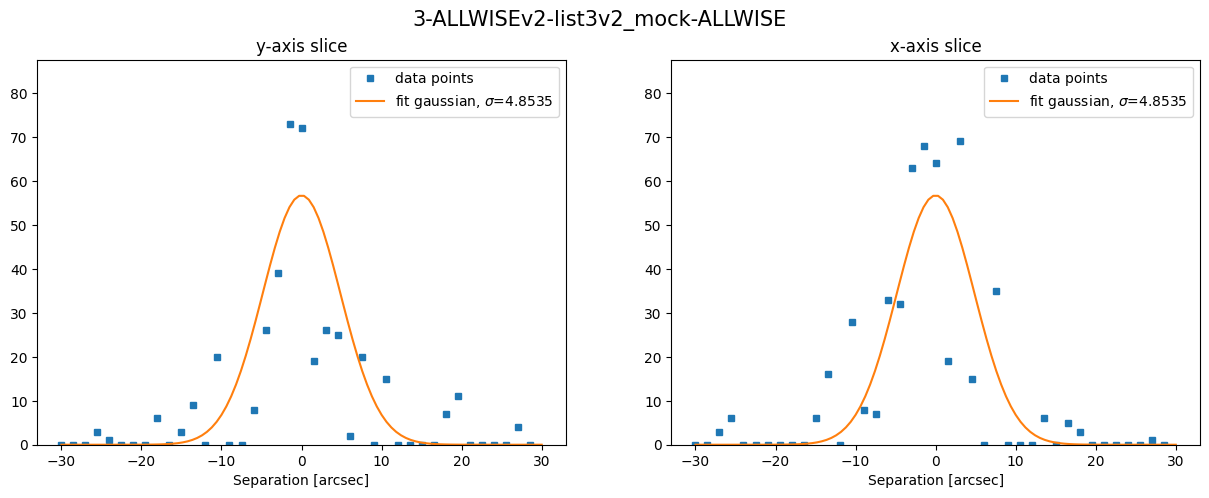

In [14]:
files = '/home/amos/planet_9/CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-ALLWISEv2.csv',
    'list3v2_mock-2MASS.csv', 'list3v2_mock-NOMAD.csv', 'list3v2_mock-ALLWISE.csv',
    'bsc_nog_2MASS.csv', 'bsc_nog_NOMAD.csv', 'bsc_nog_ALLWISE.csv',
]

num = 2
fnum = num
cnum = num
w = 0

CrossmatchDisfitv2(files+filename[fnum], files+filename[fnum+3], 
                fitrange=30, grid=41, weight=w)

#### fitting results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import griddata

import lmfit
from lmfit.lineshapes import gaussian2d
from lmfit.models import ExpressionModel

def CrossmatchDisfit(file, cname, cname0=['RA','DEC'], fitrange=70, grid=101, weight=1, mode=2):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D fitting plot
    
    Parameters:
    file: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    mode: int, the mode of the fitting
        1: 1D fitting
        2: 2D fitting with ra, dec as the x, y axis
        3: 2D fitting with only radius variable
    """

    if type(file) == str:
        data = pd.read_csv(file)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x = (data[cname0[0]]-data[n1])*3600*np.cos(data[cname0[1]]*np.pi/180)
    y = (data[cname0[1]]-data[n2])*3600
    
    # print(data[n1])
    # print(data[cname0[0]])
    
    if mode == 1:
        
        fig, ax = plt.subplots()
        
        data = {
            'ra': ax.hist(x, grid)[1],
            'rac': ax.hist(x, grid+1)[0],
            'dec': ax.hist(y, grid)[1],
            'decc': ax.hist(y, grid+1)[0]
        }
        
        plt.close(fig)
        
        xedges = np.linspace(-fitrange, fitrange, grid)
        yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()
        
        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf = X.flatten()
        yf = Y.flatten()
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        vmax = np.nanpercentile(Z, 99.9)

        dframe = pd.DataFrame(data=data)

        model = LorentzianModel()

        paramsx = model.guess(dframe['rac'], x=dframe['ra'])
        paramsy = model.guess(dframe['decc'], x=dframe['dec'])

        resultra = model.fit(dframe['rac'], paramsx, x=dframe['ra'])
        cen1x = resultra.values['center']
        sig1x = resultra.values['sigma']
        resultdec = model.fit(dframe['decc'], paramsy, x=dframe['dec'])
        cen1y = resultdec.values['center']
        sig1y = resultdec.values['sigma']
        
        fitx = model.func(dframe['ra'], **resultra.best_values)
        fity = model.func(dframe['dec'], **resultdec.best_values)

        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        plt.rcParams.update({'font.size': 15})
        # ax = axs[0]
        # art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
        # plt.colorbar(art, ax=ax, label='z')
        # ell = Ellipse(
        #         (cen1x, cen1y),
        #         width = 3*sig1x,
        #         height = 3*sig1y,
        #         edgecolor = 'w',
        #         facecolor = 'none'
        #     )
        # ax.add_patch(ell)
        # ax.set_title('Histogram of Data')
        # ax.set_xlabel('Delta RA [arcsec]')
        # ax.set_ylabel('Delta DEC [arcsec]')

        ax = axs[0]
        ax.plot(dframe['ra'], fitx, label='fit gaussian')
        ax.plot(dframe['ra'], dframe['rac'], 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('Center:{0:5.4f}, 1 Sigma:{1:5.3f}'.format(cen1x, sig1x))
        ax.set_xlabel('Delta RA [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        ax = axs[1]
        ax.plot(dframe['dec'], fity, label='fit gaussian')
        ax.plot(dframe['dec'], dframe['decc'], 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('Center:{0:5.4f}, 1 Sigma:{1:5.3f}'.format(cen1y, sig1y))
        ax.set_xlabel('Delta DEC [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()
        
        fig.suptitle('AKARI-TSL3 x '+file.split('-')[1][:-6] + '  1D fitting')
        
        plt.show()
    
    if mode == 2:

        xedges = np.linspace(-fitrange, fitrange, grid)
        yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()

        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf = X.flatten()
        yf = Y.flatten()
        
        w = z**weight+0.1
        
        model = Gaussian2dModel()
        params = model.guess(z, xf, yf)
        result = model.fit(z, x=xf, y=yf, params=params, weights=w/10)
        Amp = result.values['amplitude']
        cenx = result.values['centerx']
        sigx = result.values['sigmax']
        ceny = result.values['centery']
        sigy = result.values['sigmay']
        
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        vmax = np.nanpercentile(Z, 99.9)
        
        fit = model.func(X, Y, **result.best_values)

        Zx = Z[int((grid+1)/2)]
        fitx = fit[int((grid+1)/2)]
        Zy = Z.T[int((grid+1)/2)]
        fity = fit.T[int((grid+1)/2)]

        fig, axs = plt.subplots(2, 2, figsize=(15, 13))
        
        plt.rcParams.update({'font.size': 15})
        # plt.rcParams.update({"tick.labelsize": 13})
        
        ax = axs[0, 0]
        art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
        plt.colorbar(art, ax=ax, label='Data point Density')
        ell = Ellipse(
                (cenx, ceny),
                width = 3*sigx,
                height = 3*sigy,
                edgecolor = 'w',
                facecolor = 'none'
            )
        ax.add_patch(ell)
        ax.set_title('Histogram of Data')
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('ΔDEC [arcsec]', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)

        ax = axs[0, 1]
        art = ax.pcolor(X, Y, Z-fit, shading='auto')
        plt.colorbar(art, ax=ax, label='Data point Density')
        ax.set_title('Residual')
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('ΔDEC [arcsec]', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)

        ax = axs[1, 0]
        ax.plot(xedges[:grid-1], fitx, label='fit gaussian')
        ax.plot(xedges[:grid-1], Zx, 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('y-axis slice, Center:{0:5.3f}, 1σ:{1:5.2f}'.format(cenx, sigx))
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        ax = axs[1, 1]
        ax.plot(yedges[:grid-1], fity, label='fit gaussian')
        ax.plot(yedges[:grid-1], Zy,
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('x-axis slice, Center:{0:5.3f}, 1σ:{1:5.2f}'.format(ceny, sigy))
        ax.set_xlabel('ΔDEC [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        fig.suptitle('AKARI-TSL3 x '+file.split('-')[1][:-4]+'  2D fitting')

        plt.show()
        
    if mode == 3:

        xedges = yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()

        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf, yf = X.flatten(), Y.flatten()
        
        model = ExpressionModel(
            'amp*exp(-(x**2 / (2*sig**2)) - (y**2 / (2*sig**2)))',
            independent_vars=['x', 'y']
        )
        params = model.make_params(amp=100, sig=fitrange/100)
        
        w = z**weight
        result = model.fit(z, x=xf, y=yf, params=params, weights=w)
        Sigma = result.params['sig'].value
        print(Sigma)
        
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        Zx = Z[int((grid+1)/2)]
        Zy = Z.T[int((grid+1)/2)]

        fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

        ax = axs[0]
        ax.plot(xedges[:grid-1], Zx, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('y-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()

        ax=axs[1]
        ax.plot(yedges[:grid-1], Zy, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('x-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()
        
        plt.suptitle(file.split('/')[-1])
        
        plt.show()
        
        return Sigma
    


3.007176617897328


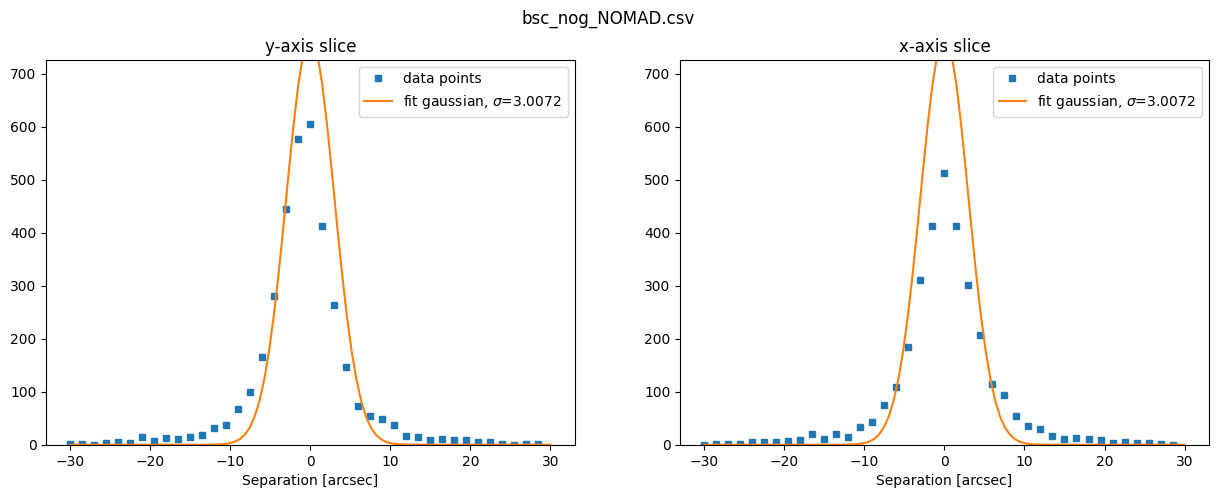

3.007176617897328

In [2]:
# from utility import CrossmatchDisfit

files = '/home/amos/planet_9/CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-ALLWISEv2.csv',
    'list3v2_mock-2MASS.csv', 'list3v2_mock-NOMAD.csv', 'list3v2_mock-ALLWISE.csv',
    'bsc_nog_2MASS.csv', 'bsc_nog_NOMAD.csv', 'bsc_nog_ALLWISE.csv',
]
cname = ['RAJ2000','DEJ2000']
num = 7
fnum = num
cnum = num
w = 1.1

CrossmatchDisfit(files+filename[fnum], cname,
                fitrange=30, grid=41, weight=w, mode=3)

### simple match

In [10]:
tsl_2mass = pd.read_csv('CentralDogma/2_Lust_/3-2MASSv2.csv')
tsl_allwise = pd.read_csv('CentralDogma/2_Lust_/3-ALLWISEv2.csv')
tsl_nomad = pd.read_csv('CentralDogma/2_Lust_/3-NOMADv2.csv')
tslhd_2mass = pd.read_csv('CentralDogma/2_Lust_/3hd-2MASSv2.csv')
tslhd_allwise = pd.read_csv('CentralDogma/2_Lust_/3hd-ALLWISEv2.csv')
tslhd_nomad = pd.read_csv('CentralDogma/2_Lust_/3hd-NOMADv2.csv')
tslbr_2mass = pd.read_csv('CentralDogma/2_Lust_/3br-2MASSv2.csv')
tslbr_allwise = pd.read_csv('CentralDogma/2_Lust_/3br-ALLWISEv2.csv')
tslbr_nomad = pd.read_csv('CentralDogma/2_Lust_/3br-NOMADv2.csv')

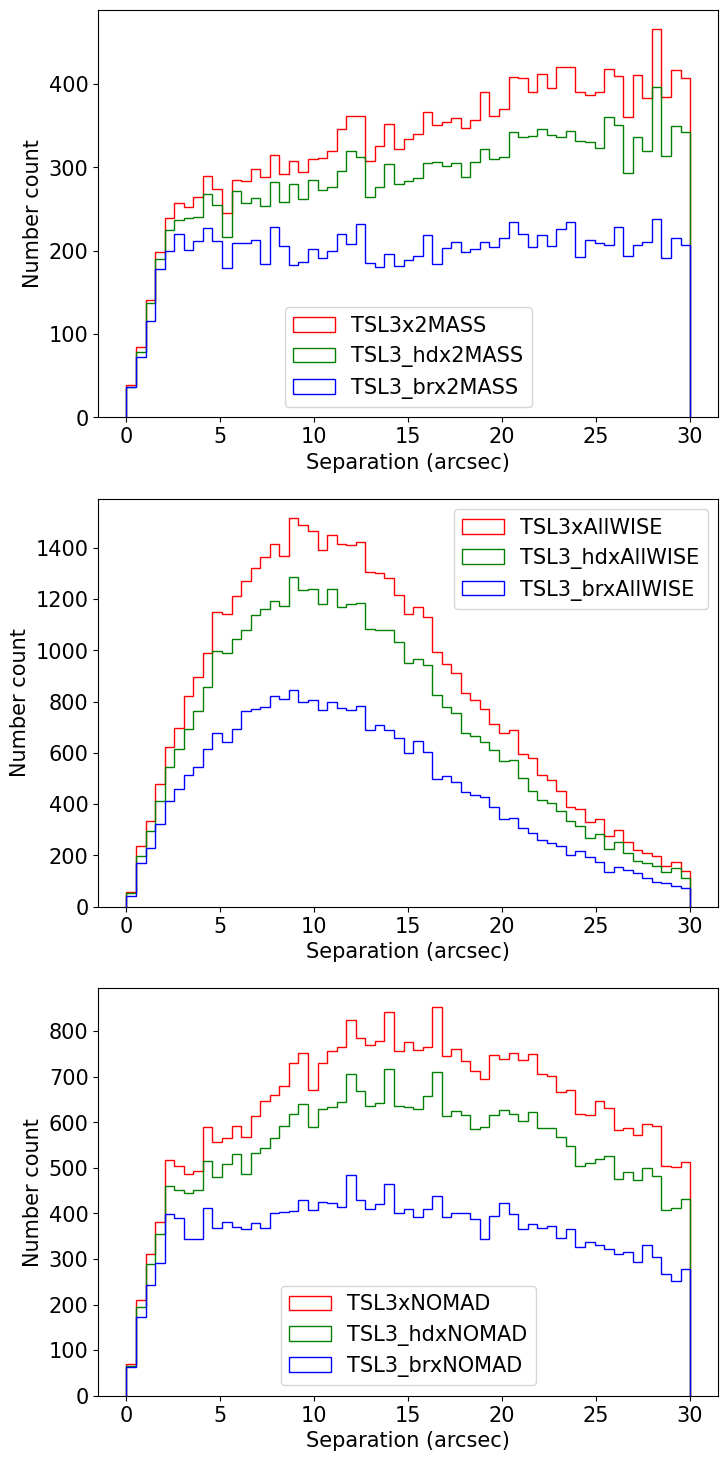

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

bins = np.linspace(0, 30, 60)

ax = axs[0]
# ax.hist(bsc_nog_2mass['Separation'], bins=bins, histtype='step', label='BSCx2MASS', color='b')
ax.hist(tsl_2mass['angDist'], bins=bins, histtype='step', label='TSL3x2MASS', color='r')
ax.hist(tslhd_2mass['angDist'], bins=bins, histtype='step', label='TSL3_hdx2MASS', color='g')
ax.hist(tslbr_2mass['angDist'], bins=bins, histtype='step', label='TSL3_brx2MASS', color='b')
# ax.hist(tslbr_2mass.loc[tslbr_2mass['Jmag']>13, 'angDist'], bins=bins, histtype='step', label='TSL3_brx2MASS', color='b')

ax.legend(fontsize=15)

ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = axs[1]
# ax.hist(bsc_nog_allwise['Separation'], bins=bins, histtype='step', label='BSCxAllWISE', color='b')
ax.hist(tsl_allwise['angDist'], bins=bins, histtype='step', label='TSL3xAllWISE', color='r')
ax.hist(tslhd_allwise['angDist'], bins=bins, histtype='step', label='TSL3_hdxAllWISE', color='g')
ax.hist(tslbr_allwise['angDist'], bins=bins, histtype='step', label='TSL3_brxAllWISE', color='b')


ax.legend(fontsize=15)
ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)


ax = axs[2]
# ax.hist(bsc_nog_nomad['Separation'], bins=bins, histtype='step', label='BSCxNOMAD', color='b')
ax.hist(tsl_nomad['angDist'], bins=bins, histtype='step', label='TSL3xNOMAD', color='r')
ax.hist(tslhd_nomad['angDist'], bins=bins, histtype='step', label='TSL3_hdxNOMAD', color='g')
ax.hist(tslbr_nomad['angDist'], bins=bins, histtype='step', label='TSL3_brxNOMAD', color='b')


ax.legend(fontsize=15)
ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# title

plt.show()

In [21]:
len(tslbr_2mass.loc[tslbr_2mass['Jmag']>13])

10999

In [22]:
len(tslbr_2mass)

11756

(array([3.000e+00, 1.000e+00, 1.100e+01, 9.000e+00, 9.000e+00, 6.000e+00,
        4.000e+00, 5.000e+00, 1.400e+01, 2.400e+01, 5.700e+01, 9.500e+01,
        2.130e+02, 3.990e+02, 9.940e+02, 2.174e+03, 3.657e+03, 3.800e+03,
        2.550e+02, 2.600e+01]),
 array([-0.732  ,  0.26175,  1.2555 ,  2.24925,  3.243  ,  4.23675,
         5.2305 ,  6.22425,  7.218  ,  8.21175,  9.2055 , 10.19925,
        11.193  , 12.18675, 13.1805 , 14.17425, 15.168  , 16.16175,
        17.1555 , 18.14925, 19.143  ]),
 [<matplotlib.patches.Polygon at 0x7f5309b13ef0>])

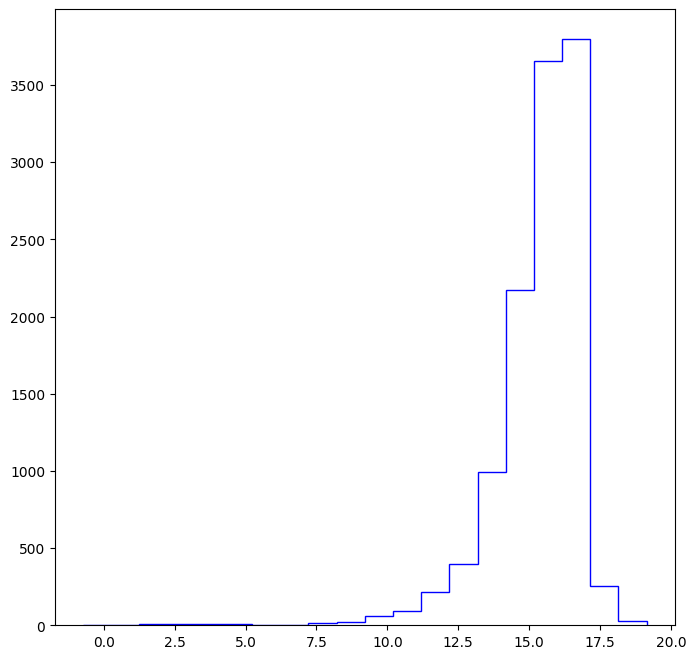

In [18]:
fig, ax = plt.subplots( figsize=(8, 8))

ax.hist(tslbr_2mass['Jmag'], bins=20, histtype='step', label='TSL3_brx2MASS', color='b')

## Mock density relation

#### mock model

In [6]:
def fk5_to_galactic(ra_list, dec_list):
    from astropy.coordinates import SkyCoord
    from astropy.coordinates import Galactic
    c = SkyCoord(ra=ra_list*u.degree, dec=dec_list*u.degree, frame='fk5')
    c = c.transform_to(Galactic)
    return c.l.degree, c.b.degree

def galactic_to_fk5(l_list, b_list):
    from astropy.coordinates import SkyCoord
    from astropy.coordinates import FK5
    c = SkyCoord(l=l_list*u.degree, b=b_list*u.degree, frame='galactic')
    c = c.transform_to(FK5)
    return c.ra.degree, c.dec.degree

def remove_galactic(data, deg=10, cname=['RA', 'DEC']):
    
    from astropy.coordinates import Longitude
    from astropy.coordinates import Latitude
    
    data['l'], data['b'] = fk5_to_galactic(data[cname[0]].values, data[cname[1]].values)
    data['l'] = Longitude(data['l'], unit=u.degree)
    data['b'] = Latitude(data['b'], unit=u.degree)
    
    data_nogalacticplane = data.loc[data['b'].apply(lambda x: x.degree) > deg]  
    
    return data_nogalacticplane

In [4]:
mock10k = pd.read_csv('CentralDogma/4_Greed_/mock10k_allwise.csv')
mock20k = pd.read_csv('CentralDogma/4_Greed_/mock20k_allwise.csv')
mock60k = pd.read_csv('CentralDogma/4_Greed_/mock60k_allwise.csv')
list3v2 = pd.read_csv('CentralDogma/4_Greed_/list3v2_allwise.csv')

In [3]:
def gaussian(x, amp, cen, sig):
    """
    1-d gaussian: gaussian(x, amp, cen, wid)
    
    input: number, array
    """
    return (amp / (np.sqrt(2*np.pi) * sig)) * np.exp(-(x-cen)**2 / (2*sig**2))

def gv(x, amp, cen, sig):
    return 2*3.14159 * x * (amp / (np.sqrt(2*np.pi) * sig)) * np.exp(-(x-cen)**2 / (2*sig**2))

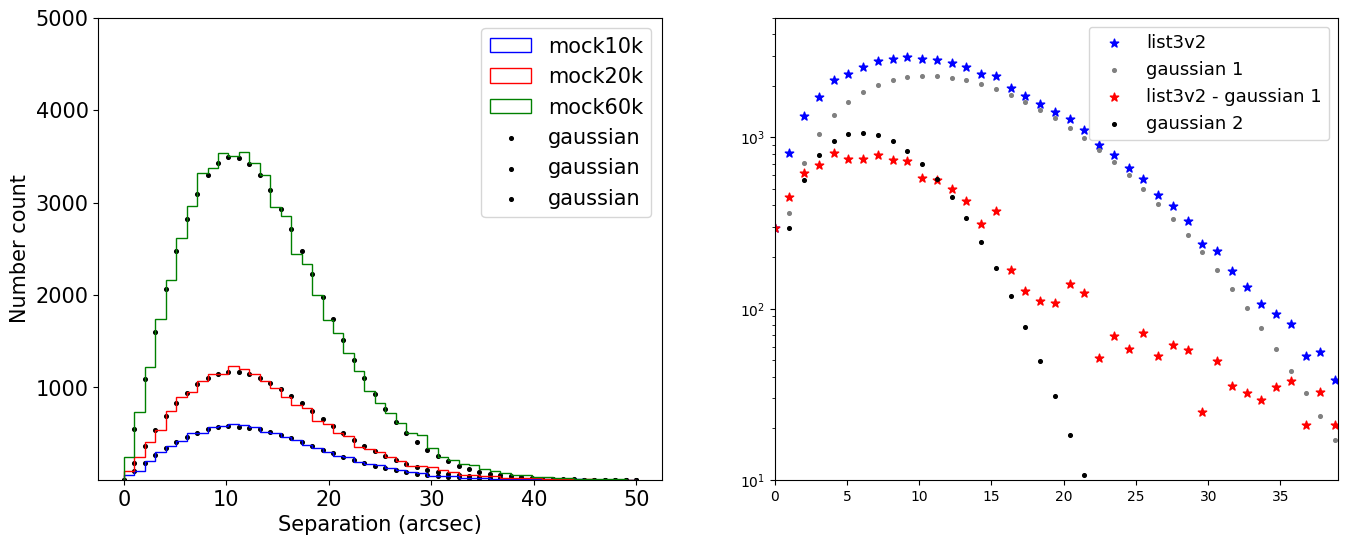

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

n = 50

bins = np.linspace(0, 50, n)

ax = axs[0]
ax.hist(mock10k['d2d'], bins=bins, histtype='step', label='mock10k', color='b')
ax.hist(mock20k['d2d'], bins=bins, histtype='step', label='mock20k', color='r')
sixty = ax.hist(mock60k['d2d'], bins=bins, histtype='step', label='mock60k', color='g')

# ax.scatter(sixty[1][:-1], sixty[0]/3, color='g', s=7, marker='s', label='mock60k/3')
# ax.scatter(sixty[1][:-1], sixty[0]/6, color='g', s=7, label='mock60k/6')

ax.scatter(bins, gv(bins, 380, 0, 10.6), color='k', s=7, label='gaussian')
ax.scatter(bins, gv(bins, 770, 0, 10.6), color='k', s=7, label='gaussian')
ax.scatter(bins, gv(bins, 2300, 0, 10.6), color='k', s=7, label='gaussian')

ax.legend(fontsize=15)
ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
# ax.set_yscale('log')
ax.set_ylim(1, 5000)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = axs[1]

list3v2_allwise = np.histogram(list3v2['d2d'], bins=bins)
ax.scatter(bins[:-1], list3v2_allwise[0], color='b', s=40, marker='*', label='list3v2')

ax.scatter(bins[:-1], gv(bins[:-1], 1500, 0, 10.6), color='grey', s=7, label='gaussian 1')

ax.scatter(bins[:-1], list3v2_allwise[0]-gv(bins[:-1], 1500, 0, 10.6), color='r', s=40, marker='*', label='list3v2 - gaussian 1')

ax.scatter(bins[:-1], gv(bins[:-1], 700, 0, 6), color='k', s=7, label='gaussian 2')

ax.legend(fontsize=13)
ax.set_xlim(0, 39)
ax.set_yscale('log')
ax.set_ylim(10, 5000)

plt.show()

### tsl3 fit

In [57]:
# tsl3_2mass = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_br-2MASS.csv')
tsl3_d16_2mass = pd.read_csv('CentralDogma/4_Greed_/tsl3_d16_2mass.csv')
tsl3_d16_nomad = pd.read_csv('CentralDogma/4_Greed_/tsl3_d16_nomad.csv')
tsl3_d16_allwise = pd.read_csv('CentralDogma/4_Greed_/tsl3_d16_allwise.csv')
mock20k_2mass = pd.read_csv('CentralDogma/4_Greed_/mock20k_2mass.csv')
# mock60k_2mass = pd.read_csv('CentralDogma/4_Greed_/mock60k_2mass.csv')
mock20k_allwise = pd.read_csv('CentralDogma/4_Greed_/mock20k_allwise.csv')
mock20k_nomad = pd.read_csv('CentralDogma/4_Greed_/mock20k_nomad.csv')

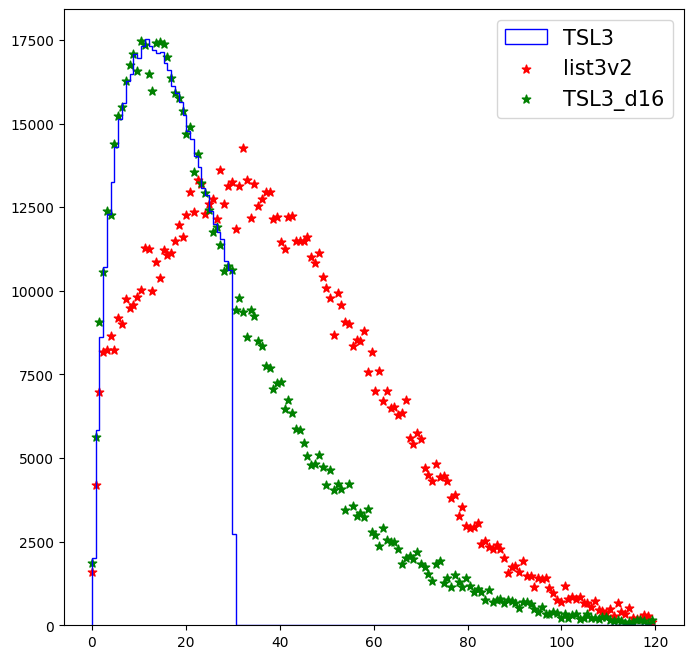

In [110]:
fig, ax = plt.subplots( figsize=(8, 8))

bins = np.linspace(0, 120, 150)
# bins = np.linspace(0, 30, 50)

ax.hist(tsl3_2mass['angDist'], bins=bins, histtype='step', label='TSL3', color='b')

tsl3v2 = np.histogram(list3v2_2mass['d2d'], bins=bins)
ax.scatter(bins[:-1], tsl3v2[0]*20, color='r', s=40, marker='*', label='list3v2')

tsl3_d16 = np.histogram(tsl3_d16_2mass['d2d'], bins=bins)
ax.scatter(bins[:-1], tsl3_d16[0]*16, color='g', s=40, marker='*', label='TSL3_d16')

ax.legend(fontsize=15)

plt.show()

In [2]:
def read_tsl_data(file, density='d16_'):
    
    return pd.read_csv(f'CentralDogma/4_Greed_/tsl3_{density}{file}.csv')
    
def read_mock_data(file, density='20k'):
    
    return pd.read_csv(f'CentralDogma/4_Greed_/mock{density}_{file}.csv')

def tsl3_model_check(files, scale_factor, xanges=[60, 60, 60], yranges=[5.3e4, 5.3e4, 5.3e4]):
    
    fig, axs = plt.subplots(2, 3, figsize=(24, 12), gridspec_kw={'height_ratios': [4, 1]})

    n = 50
    colors = ['b', 'r', 'g', '#AAAAFF', '#FFAAAA', '#99F099']
    
    for i in range(3):
        
        ax = axs[0, i]
        scale = scale_factor[i]
        bins = np.linspace(0, xanges[i], n)
        mock = np.histogram(read_mock_data(files[i])['d2d'], bins=bins)
        mockdata = mock[0]*scale
        tsl3 = np.histogram(read_tsl_data(files[i])['d2d'], bins=bins)
        tsl3data = tsl3[0]*16
        ax.scatter(bins[:-1], mockdata,
                   color=colors[i+3], s=40, marker='s', facecolor='none', label=f'mock_tsl3 x {scale}')
        ax.scatter(bins[:-1], tsl3data,
                   color=colors[i], s=80, marker='*', label=f'tsl3 x {files[i]}')
        ax.set_xlim(0, xanges[i])
        ax.set_ylim(0, yranges[i])
        ax.set_title(f'TSL3 x {files[i]}', fontsize=15)

        ax = axs[1, i]
        ax.hlines(0, 0, xanges[i], color='k', linestyle='--')
        ax.scatter(bins[:-1], (tsl3data - mockdata),
                   color=colors[i], s=40, marker='s', label='residual')
        ax.set_xlim(0, xanges[i])
        ax.legend(fontsize=15)


    for _, ax in enumerate(axs[0, :]):
        ax.axvline(32, color='grey', linestyle='-.', label='32 arcsec, 0.5 SW pixel size')
        ax.legend(fontsize=15)
        ax.set_xlabel('Separation (arcsec)',fontsize=15)
        ax.set_ylabel('Number count',fontsize=15)
        # ax.set_yscale('log')
        # ax.set_ylim(2e2, 6e4)

        ax.tick_params(axis='both', which='major', labelsize=15)
        
    for _, ax in enumerate(axs[1, :]):
        ax.axvline(32, color='grey', linestyle='-.', label='32 arcsec, 0.5 SW pixel size')
        ax.set_ylim(-2e3, 5e3)
        ax.set_ylabel('Residual',fontsize=15)
        # ax.tick_params(axis='both', which='major', labelsize=15)

    plt.show()

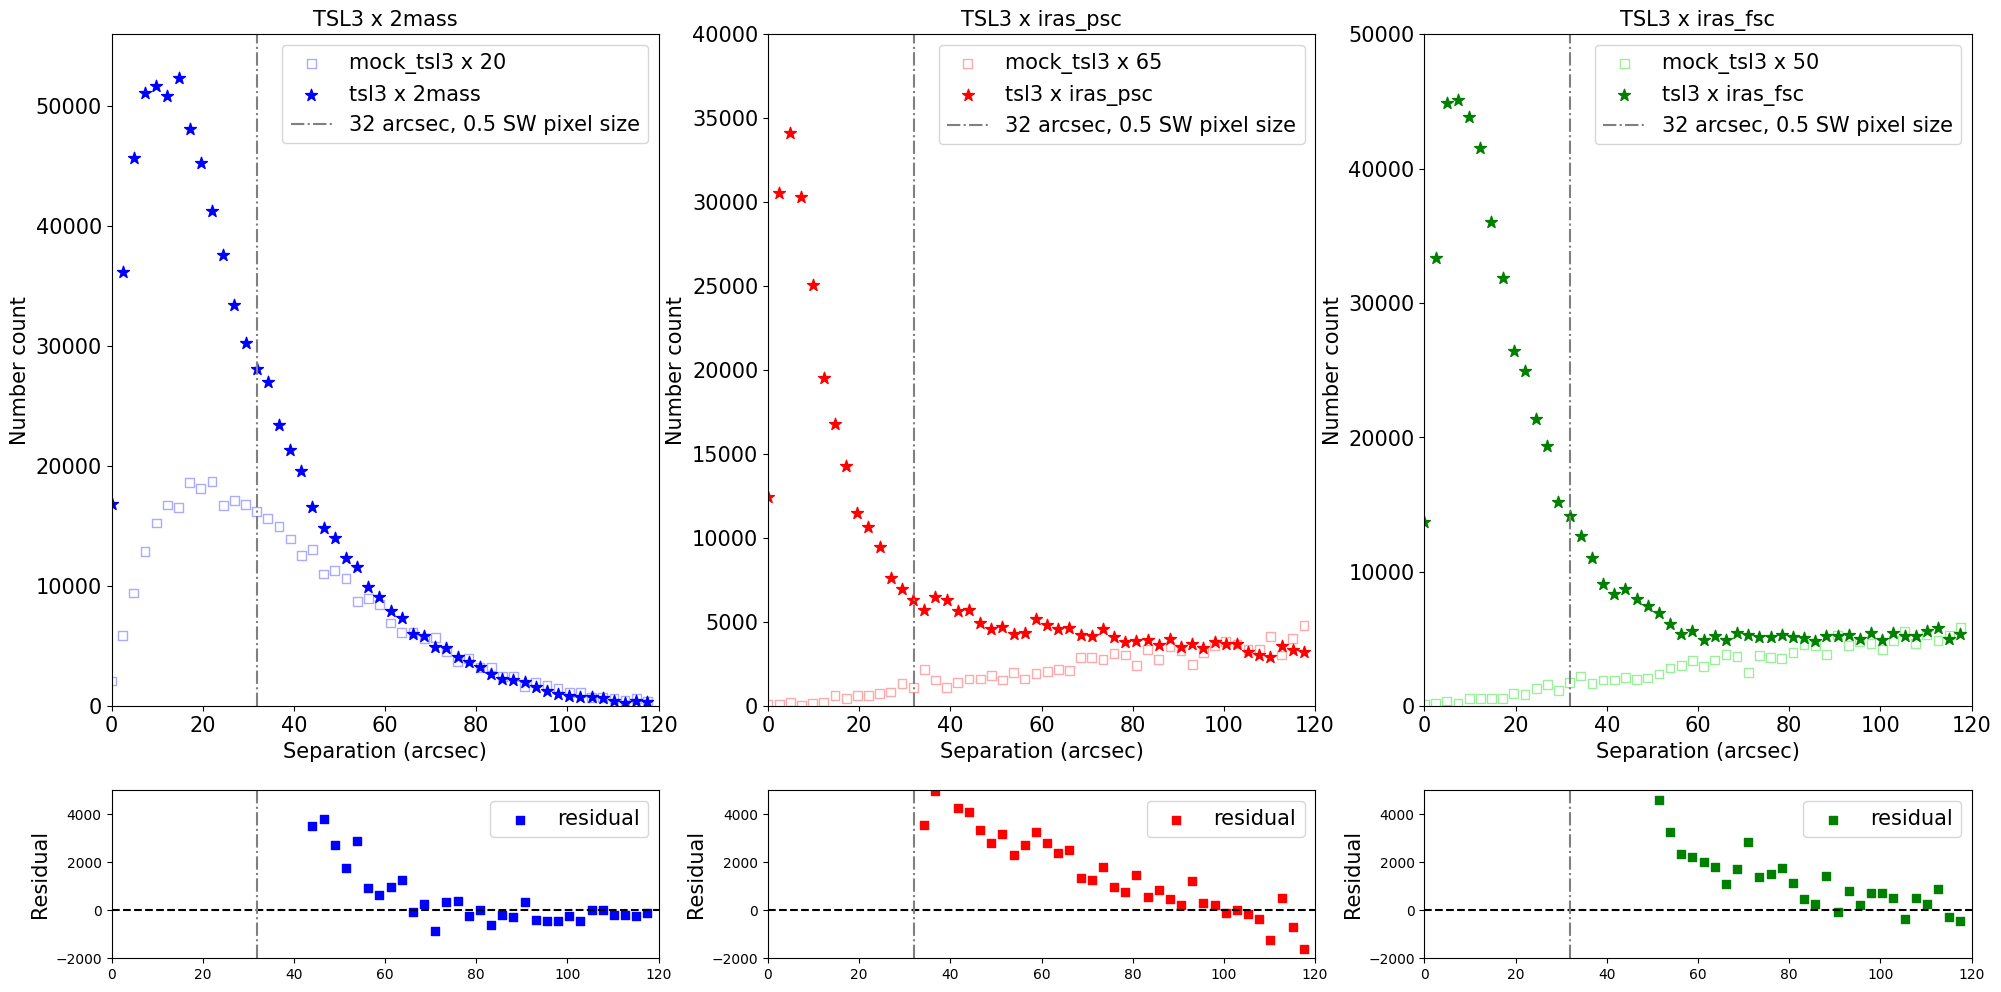

In [4]:
files = ['2mass', 'iras_psc', 'iras_fsc']
scale_factor = [20, 65, 50]
ranges = [120, 120, 120]
yrange = [5.6e4, 4e4, 5e4]
tsl3_model_check(files, scale_factor, xanges=ranges, yranges=yrange)

### fit after subtraction

In [22]:
from scipy.interpolate import griddata
from lmfit.models import ExpressionModel
def CrossmatchDisfitv2(file1, file2, cname=['RAJ2000','DEJ2000'], cname0=['RA','DEC'], fitrange=30, grid=41, weight=1.1, scale=1):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D radial Gaussian fitting result plot with file1-file2
    
    Parameters:
    file1: str, the file path of the crossmatch result
    file2: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    """

    if type(file1) == str:
        data1 = pd.read_csv(file1)
        data2 = pd.read_csv(file2)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x1 = (data1[cname0[0]]-data1[n1])*3600*np.cos(data1[cname0[1]]*np.pi/180)
    y1 = (data1[cname0[1]]-data1[n2])*3600
    
    x2 = (data2[cname0[0]]-data2[n1])*3600*np.cos(data2[cname0[1]]*np.pi/180)
    y2 = (data2[cname0[1]]-data2[n2])*3600
    
    xedges = yedges = np.linspace(-fitrange, fitrange, grid)
    H1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedges, yedges))
    H2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedges, yedges))
    H = H1*16 - H2*scale
    # replace all negative values with 0
    H = np.where(H<0, 0, H)
    H = H.T
    z = H.flatten()

    X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
    xf, yf = X.flatten(), Y.flatten()
    
    model = ExpressionModel(
            'amp*exp(-((x-cx)**2 / (2*sig**2)) - ((y-cy)**2 / (2*sig**2)))',
            independent_vars=['x', 'y']
        )
    params = model.make_params(amp=100, sig=fitrange/100, cx=0, cy=0)
    
    w = z**weight
    result = model.fit(z, x=xf, y=yf, params=params, weights=w)
    Sigma = result.params['sig'].value
    print(Sigma)
    
    Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
    Zx = Z[int((grid+1)/2)]
    Zy = Z.T[int((grid+1)/2)]
    
    vmax = np.nanpercentile(Z, 95)

    fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

    ax = axs[0]
    ax.plot(xedges[:grid-1], Zx, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('y-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()

    ax=axs[1]
    ax.plot(yedges[:grid-1], Zy, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('x-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()
    
    # ax = axs[1]
    # art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
    # plt.colorbar(art, ax=ax, label='Data point Density')
    # # ax.set_title('Histogram of Data')
    # ax.set_xlabel('Δx [arcsec]', fontsize=15)
    # ax.set_ylabel('Δy [arcsec]', fontsize=15)
    # ax.tick_params(axis='both', labelsize=13)
    
    plt.suptitle(file1.split('/')[-1][:-4]+' - '+file2.split('/')[-1][:-4]+f' x {scale}', fontsize=15)
    
    plt.show()

files = '/home/amos/planet_9/CentralDogma/4_Greed_/'
filename = [
    'tsl3_d16_2mass.csv', 'tsl3_d16_nomad.csv', 'tsl3_d16_allwise.csv',
    'tsl3_d16_catwise.csv', 'tsl3_d16_ps1.csv', 'tsl3_d16_sdss.csv',
    'tsl3_d16_simbad.csv', 'tsl3_d16_unwise.csv', 'tsl3_d16_wise.csv',
    'mock20k_2mass.csv', 'mock20k_nomad.csv', 'mock20k_allwise.csv',
    'mock20k_catwise.csv', 'mock20k_ps1.csv', 'mock20k_sdss.csv',
    'mock20k_simbad.csv', 'mock20k_unwise.csv', 'mock20k_wise.csv',
]


7.947585603597748


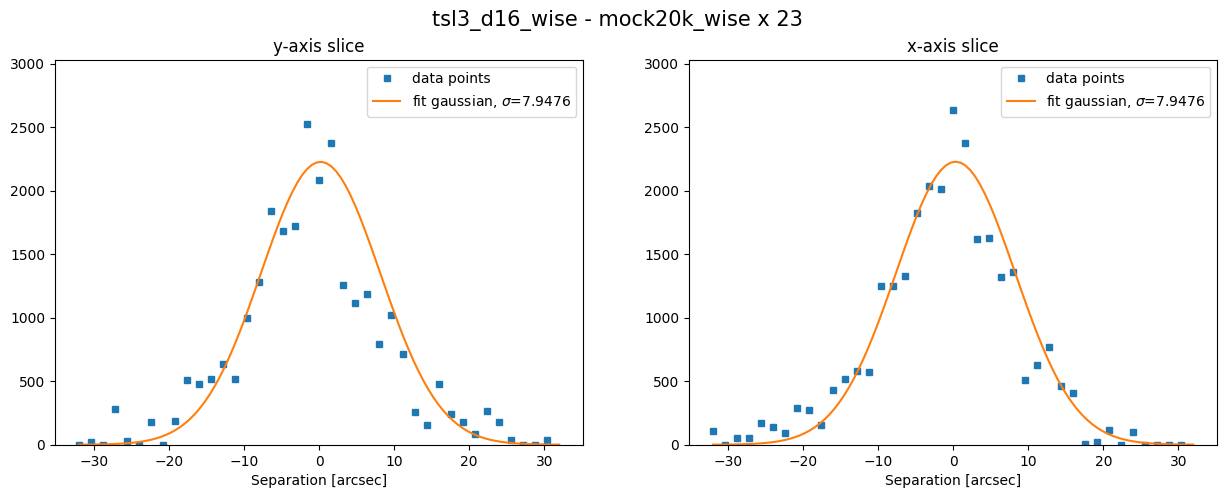

In [34]:
num = 8
w = 1
fitrange = 32
scale = 23

CrossmatchDisfitv2(files+filename[num], files+filename[num+9],
                   fitrange=fitrange, grid=41, weight=w, scale=scale)

### mock fit (not gaussian)

In [61]:
from scipy.interpolate import griddata
from lmfit.models import ExpressionModel

def CrossmatchDisfit4mock(file, cname, cname0=['RA','DEC'], fitrange=70, grid=101, weight=1, mode=2):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D fitting plot
    
    Parameters:
    file: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    mode: int, the mode of the fitting
        1: 1D fitting
        2: 2D fitting with ra, dec as the x, y axis
        3: 2D fitting with only radius variable
    """

    if type(file) == str:
        data = pd.read_csv(file)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x = (data[cname0[0]]-data[n1])*3600*np.cos(data[cname0[1]]*np.pi/180)
    y = (data[cname0[1]]-data[n2])*3600
        
    if mode == 3:

        xedges = yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()

        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf, yf = X.flatten(), Y.flatten()
        
        model = ExpressionModel(
            'amp*exp(-(x**2 / (2*sig**2)) - (y**2 / (2*sig**2)))',
            independent_vars=['x', 'y']
        )
        params = model.make_params(amp=100, sig=fitrange/100)
        
        w = z**weight
        result = model.fit(z, x=xf, y=yf, params=params, weights=w)
        Sigma = result.params['sig'].value
        Amp = result.params['amp'].value
        print(Amp, Sigma)
        
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        Zx = Z[int((grid+1)/2)]
        Zy = Z.T[int((grid+1)/2)]

        fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

        ax = axs[0]
        ax.plot(xedges[:grid-1], Zx, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('y-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()

        ax=axs[1]
        ax.plot(yedges[:grid-1], Zy, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('x-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()
        
        plt.suptitle(file.split('/')[-1])
        
        plt.show()
        
        return Amp, Sigma

def integraled_radialG(x, amp, cen, sig):
    return 2*3.14159 * x * amp * np.exp(-(x-cen)**2 / (2*sig**2))

files = '/home/amos/planet_9/CentralDogma/4_Greed_/'
filename = [
    'mock20k_2mass.csv', 'mock20k_nomad.csv', 'mock20k_allwise.csv'
]
cname = ['RAJ2000','DEJ2000']

27.70494194204556 10.78018538451538


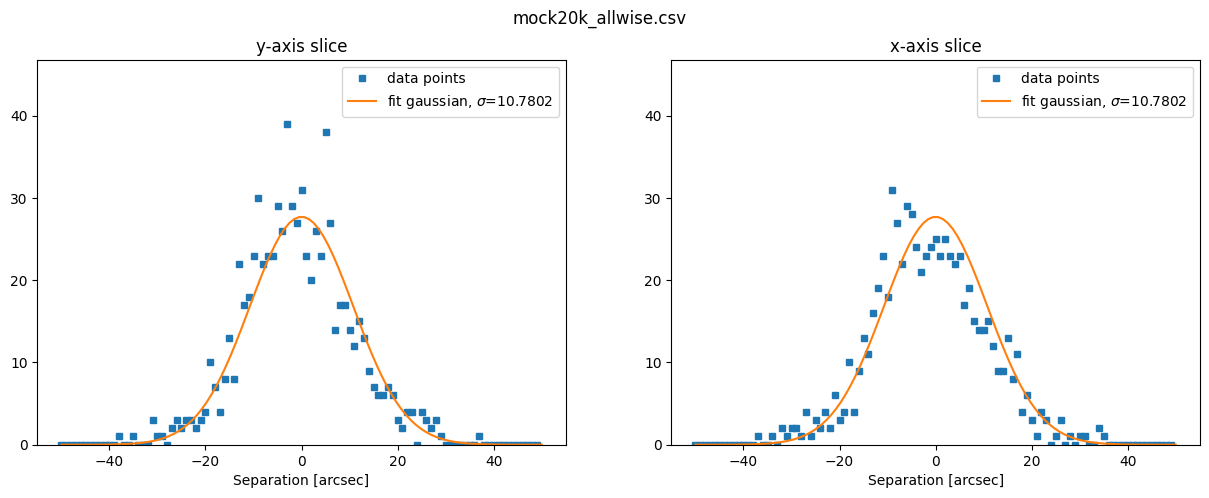

In [183]:
num = 2
w = 0
fitrange = 50

amp, sigma = CrossmatchDisfit4mock(files+filename[num], cname,
                fitrange=fitrange, grid=101, weight=w, mode=3)

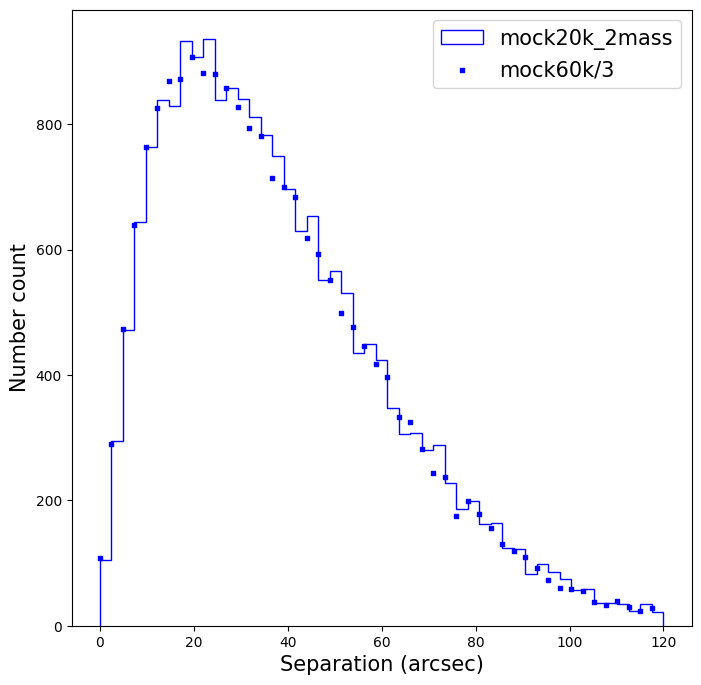

In [72]:
fig , ax = plt.subplots( figsize=(8, 8))

bins = np.linspace(0, 120, 50)

ax.hist(mock20k_2mass['d2d'], bins=bins, histtype='step', label='mock20k_2mass', color='b')
m60 = np.histogram(mock60k_2mass['d2d'], bins=bins)
ax.scatter(bins[:-1], m60[0]/3, color='b', s=7, marker='s', label='mock60k/3')
# ax.hist(mock20k_nomad['d2d'], bins=bins, histtype='step', label='mock20k_nomad', color='r')
# ax.hist(mock20k_allwise['d2d'], bins=bins, histtype='step', label='mock20k_allwise', color='g')

# ax.scatter(bins, integraled_radialG(bins, 30, 0, 25), color='k', s=7, label='gaussian')

ax.legend(fontsize=15)
ax.set_xlabel('Separation (arcsec)',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
# ax.set_yscale('log')

plt.show()

## All sky, nog, bright sources

### data 

In [51]:
tsl3 = pd.read_csv('CentralDogma/1_Limbo_/list3flux.csv')
remove_galactic(tsl3).to_csv('CentralDogma/1_Limbo_/list3flux_nogalactic.csv', index=False)

In [2]:
tsl3_nog = pd.read_csv('CentralDogma/1_Limbo_/list3flux_nogalactic.csv')
tsl3_nog_bright = tsl3_nog.loc[tsl3_nog['FLUX90']>0.2]

In [4]:
tsl3_nog_bright[['OBJID', 'RA', 'DEC', 'FLUX90']].to_csv('CentralDogma/1_Limbo_/tsl3flux_nog_br.csv', index=False)

### mock data

In [39]:
mock_x = np.random.normal(0, 1, 50000)
mock_y = np.random.normal(0, 1, 50000)
mock_z = np.random.normal(0, 1, 50000)
mock_Car = pd.DataFrame({'x': mock_x, 'y': mock_y, 'z': mock_z})

x = mock_Car['x']/(mock_Car['x']**2 + mock_Car['y']**2 + mock_Car['z']**2)**0.5
y = mock_Car['y']/(mock_Car['x']**2 + mock_Car['y']**2 + mock_Car['z']**2)**0.5
z = mock_Car['z']/(mock_Car['x']**2 + mock_Car['y']**2 + mock_Car['z']**2)**0.5

mock_l = np.arctan2(y, x)*180/np.pi
mock_b = np.arcsin(z)*180/np.pi
mock_Gal = pd.DataFrame({'l': mock_l, 'b': mock_b})

def galactic_to_fk5(l_list, b_list):
    from astropy.coordinates import SkyCoord
    from astropy.coordinates import FK5
    from astropy import units as u
    c = SkyCoord(l=l_list*u.degree, b=b_list*u.degree, frame='galactic')
    c = c.transform_to(FK5)
    return c.ra.degree, c.dec.degree


mock_ra, mock_dec = galactic_to_fk5(list(mock_Gal[mock_Gal['b']>10]['l']), list(mock_Gal[mock_Gal['b']>10]['b']))

tsl3_mock = pd.DataFrame({'RA': mock_ra, 'DEC': mock_dec})
tsl3_mock.to_csv('CentralDogma/4_Greed_/mock_20k_sphere.csv', index=False)

### random tsl3


In [3]:
tsl3 = pd.read_csv('CentralDogma/1_Limbo_/list3flux_nog_br.csv')

In [10]:
# pick 51000 random sources from the list3flux_nog_br.csv
tsl3_sample = tsl3.sample(n=51000)
tsl3_sample.to_csv('CentralDogma/1_Limbo_/tsl3_nog_br_16sample2.csv', index=False)

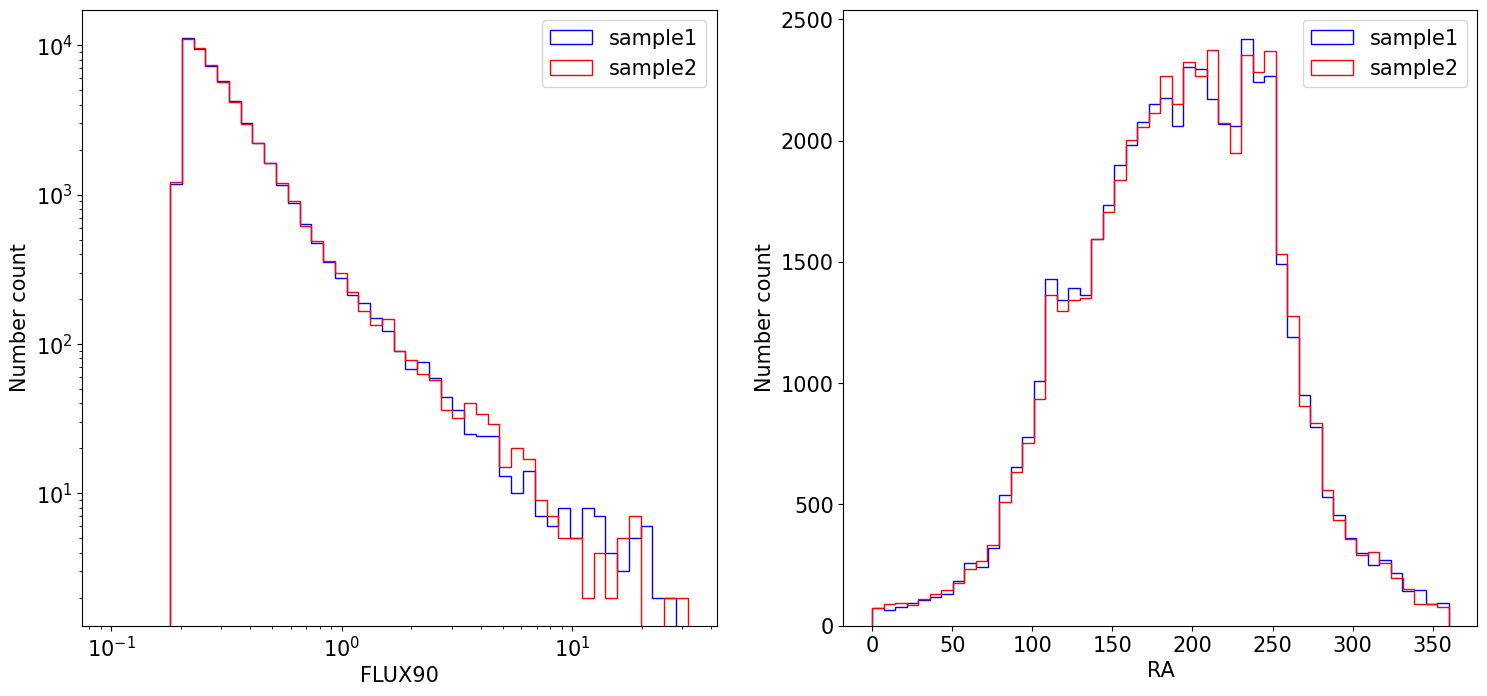

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

a = pd.read_csv('CentralDogma/1_Limbo_/tsl3_nog_br_16sample1.csv')
b = pd.read_csv('CentralDogma/1_Limbo_/tsl3_nog_br_16sample2.csv')

bins = np.logspace(-1, 1.5, 50)

ax = axs[0]
ax.hist(a['FLUX90'], bins=bins, histtype='step', label='sample1', color='b')
ax.hist(b['FLUX90'], bins=bins, histtype='step', label='sample2', color='r')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=15)
ax.set_xlabel('FLUX90',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = axs[1]
ax.hist(a['RA'], bins=50, histtype='step', label='sample1', color='b')
ax.hist(b['RA'], bins=50, histtype='step', label='sample2', color='r')

ax.legend(fontsize=15)
ax.set_xlabel('RA',fontsize=15)
ax.set_ylabel('Number count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

### remove duplicated

In [9]:
def crossmatch(data1, data2, radius=1, merge=True):
    
    ''' Crossmatch two datasets using astropy.coordinates.match_coordinates_sky
    and return a merged dataset with matched rows from both datasets.
    
    Parameters:
    data1 (DataFrame): First dataset to crossmatch, ['ra', 'dec']
    data2 (DataFrame): Second dataset to crossmatch, ['ra', 'dec']
    radius (float): Maximum separation between matches in arcseconds
    
    Returns:
    merged_data (DataFrame): Merged dataset containing matched rows from data1 and data2
    
    ''' 
    
    from astropy.coordinates import match_coordinates_sky
    from astropy.coordinates import SkyCoord
        
    # Create SkyCoord objects for both datasets
    coords1 = SkyCoord(ra=data1['RA'], dec=data1['DEC'], unit="deg")
    coords2 = SkyCoord(ra=data2['RAJ2000'], dec=data2['DEJ2000'], unit="deg")

    # Find the nearest neighbors in coords2 for each point in coords1
    idx, d2d, d3d = match_coordinates_sky(coords1, coords2, nthneighbor=1)

    # Create a mask for matches within the specified radius
    mask = d2d.arcsec <= radius

    # Add matching indices and distances to data1
    data1['idx'] = idx
    data1['d2d'] = d2d.arcsec
    
    if merge:

        # Filter data1 and data2 to only include matches, iloc is used to keep the same index
        matched_data1 = data1[mask].reset_index(drop=True)
        matched_data2 = data2.iloc[idx[mask]].reset_index(drop=True)

        # Merge matched rows from data1 and data2
        merged_data = pd.concat([matched_data1, matched_data2], axis=1)

        return merged_data
    
    else:
        return data1[mask]

In [10]:
catname = 'sdss'
cat1 = pd.read_csv(f'CentralDogma/4_Greed_/tsl3_d16_{catname}.csv', usecols=['RAJ2000', 'DEJ2000'])
# cat2 = pd.read_csv('CentralDogma/2_Lust_/list3v2_ra_dec.csv', usecols=['RA', 'DEC'])
cat2 = pd.read_csv('CentralDogma/1_Limbo_/tsl3_nog_br_16sample1.csv', usecols=['RA', 'DEC'])
# cat1 = pd.read_csv(f'CentralDogma/4_Greed_/mock20k_{catname}.csv', usecols=['RAJ2000', 'DEJ2000'])
# cat2 = pd.read_csv('CentralDogma/4_Greed_/mock_20k.csv', usecols=['RA', 'DEC'])

In [11]:
len(cat1)

1253558

In [5]:
cat1 = cat1[(cat1['RAJ2000']>0)&(cat1['DEJ2000']>-90)]

In [12]:
cat = crossmatch(cat2, cat1, radius=120, merge=True)
cat

ValueError: Catalog coordinates cannot contain NaN entries.

In [7]:
cat.to_csv(f'CentralDogma/4_Greed_/tsl3_d16_{catname}.csv', index=False)

### hist

In [2]:
tsl_2mass = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_br-2MASS.csv')
tsl_allwise = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_br-ALLWISE.csv')
tsl_nomad = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_br-NOMAD.csv')
tsl_mo_2mass = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_mock-2MASS.csv')
tsl_mo_allwise = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_mock-ALLWISE.csv')
tsl_mo_nomad = pd.read_csv('CentralDogma/2_Lust_/tsl3_nog_mock-NOMAD.csv')

bsc_nog_2mass = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_2MASS.csv')
bsc_nog_allwise = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_ALLWISE.csv')
bsc_nog_nomad = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_NOMAD.csv')
bsc_mo_2mass = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_mock-2MASS.csv')
bsc_mo_allwise = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_mock-ALLWISE.csv')
bsc_mo_nomad = pd.read_csv('CentralDogma/2_Lust_/bsc_nog_mock-NOMAD.csv')

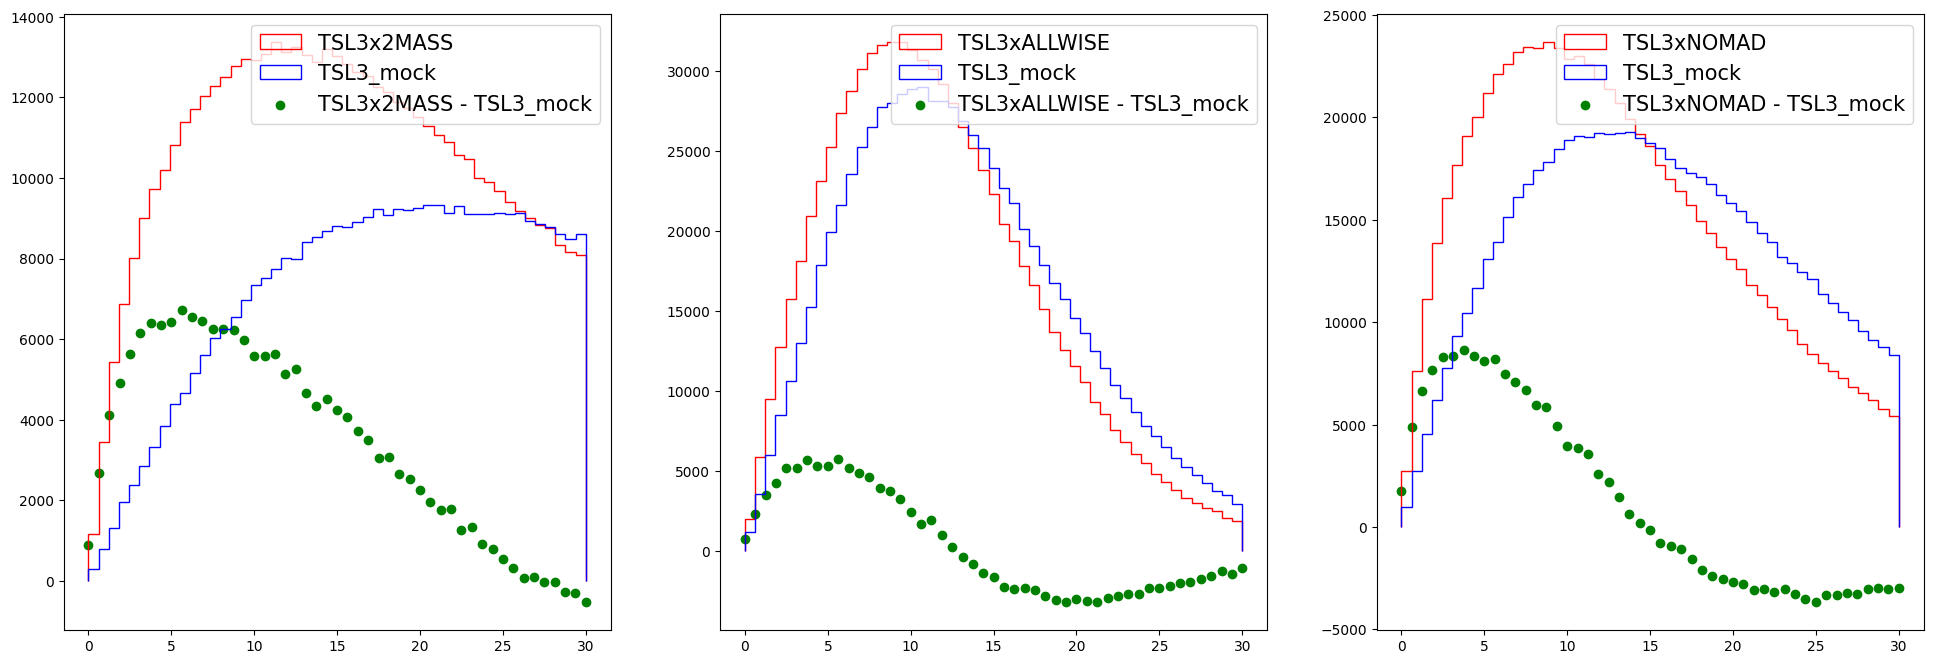

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

n = 50
density_plot = False

bins = np.linspace(0, 30, n)
x = np.linspace(0, 30, n-1)

ax = axs[0]
# A = ax.hist(bsc_nog_2mass['angDist'], bins=bins, histtype='step', label='BSCx2MASS', color='k', density=density_plot)
# B = ax.hist(bsc_mo_2mass['angDist'], bins=bins, histtype='step', label='BSC_mock', color='gray', density=density_plot)
a = ax.hist(tsl_2mass['angDist'], bins=bins, histtype='step', label='TSL3x2MASS', color='r', density=density_plot)
b = ax.hist(tsl_mo_2mass['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=density_plot)
ax.scatter(x, (a[0]-b[0]), color='g', label='TSL3x2MASS - TSL3_mock')
# ax.scatter(x, (A[0]-B[0]), color='k', label='BSCx2MASS - BSC_mock')
if density_plot:
    ax.set_ylim(0, 0.1)
else:
    pass
ax.legend(loc='upper right', fontsize=15)

ax = axs[1]
# A = ax.hist(bsc_nog_allwise['angDist'], bins=bins, histtype='step', label='BSCxALLWISE', color='k', density=density_plot)
# B = ax.hist(bsc_mo_allwise['angDist'], bins=bins, histtype='step', label='BSC_mock', color='gray', density=density_plot)
c = ax.hist(tsl_allwise['angDist'], bins=bins, histtype='step', label='TSL3xALLWISE', color='r', density=density_plot)
d = ax.hist(tsl_mo_allwise['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=density_plot)
ax.scatter(x, (c[0]-d[0]), color='g', label='TSL3xALLWISE - TSL3_mock')
# ax.scatter(x, (A[0]-B[0]), color='k', label='BSCxALLWISE - BSC_mock')
if density_plot:
    ax.set_ylim(0, 0.1)
else:
    pass
ax.legend(loc='upper right', fontsize=15)

ax = axs[2]
# A = ax.hist(bsc_nog_nomad['angDist'], bins=bins, histtype='step', label='BSCxNOMAD', color='k', density=density_plot)
# B = ax.hist(bsc_mo_nomad['angDist'], bins=bins, histtype='step', label='BSC_mock', color='gray', density=density_plot)
e = ax.hist(tsl_nomad['angDist'], bins=bins, histtype='step', label='TSL3xNOMAD', color='r', density=density_plot)
f = ax.hist(tsl_mo_nomad['angDist'], bins=bins, histtype='step', label='TSL3_mock', color='b', density=density_plot)
ax.scatter(x, (e[0]-f[0]), color='g', label='TSL3xNOMAD - TSL3_mock')
# ax.scatter(x, (A[0]-B[0]), color='k', label='BSCxNOMAD - BSC_mock')
if density_plot:
    ax.set_ylim(0, 0.12)
else:
    pass
ax.legend(loc='upper right', fontsize=15)

Text(0.5, 1.0, '0.6 x TSL3_mock')

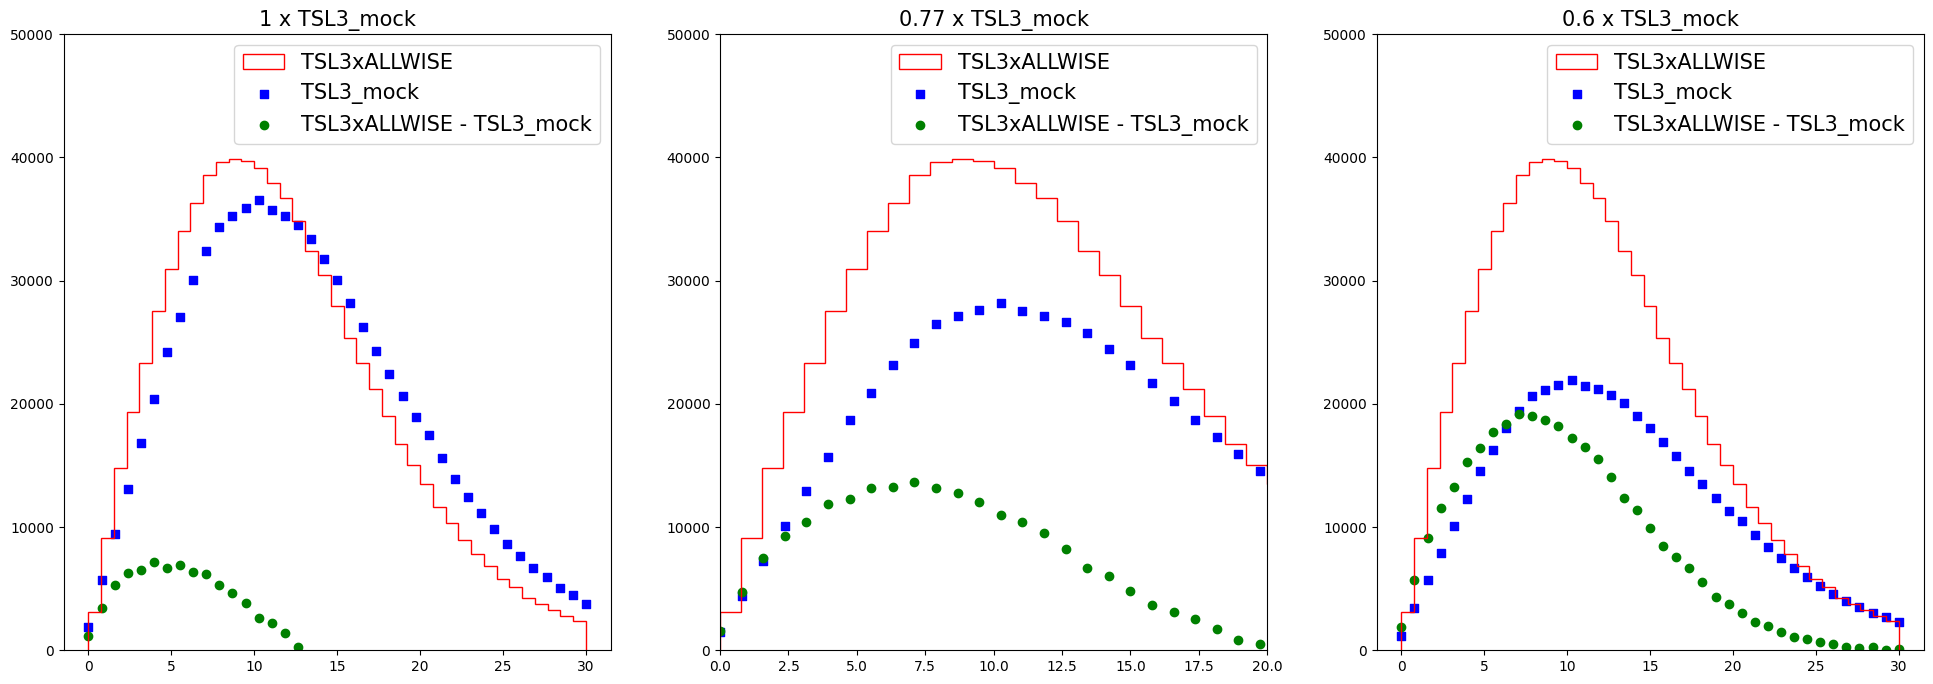

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

C1 = tsl_allwise['angDist']
C2 = tsl_mo_allwise['angDist']
cname = 'ALLWISE'

n = 40

bins = np.linspace(0, 30, n)
x = np.linspace(0, 30, n-1)

B = np.histogram(C2, bins=bins)

ax = axs[0]
A = ax.hist(C1, bins=bins, histtype='step', label=f'TSL3x{cname}', color='r')
ax.scatter(x, B[0], color='b', marker='s', label='TSL3_mock')
ax.scatter(x, (A[0]-B[0]), color='g', label=f'TSL3x{cname} - TSL3_mock')

ax.set_ylim(0, 5e4)
ax.legend(loc='upper right', fontsize=15)
ax.set_title('1 x TSL3_mock', fontsize=15)

s1 = 0.77
ax = axs[1]
e = ax.hist(C1, bins=bins, histtype='step', label=f'TSL3x{cname}', color='r')
ax.scatter(x, s1*B[0], color='b', marker='s', label='TSL3_mock')
ax.scatter(x, (A[0]-B[0]*s1), color='g', label=f'TSL3x{cname} - TSL3_mock')

ax.set_xlim(0, 20)
ax.set_ylim(0, 5e4)
ax.legend(loc='upper right', fontsize=15)
ax.set_title(f'{s1} x TSL3_mock', fontsize=15)


s2 = 0.6
ax = axs[2]
e = ax.hist(C1, bins=bins, histtype='step', label=f'TSL3x{cname}', color='r')
ax.scatter(x, B[0]*s2, color='b', marker='s', label='TSL3_mock')
ax.scatter(x, (A[0]-B[0]*s2), color='g', label=f'TSL3x{cname} - TSL3_mock')

ax.set_ylim(0, 5e4)
ax.legend(loc='upper right', fontsize=15)
ax.set_title(f'{s2} x TSL3_mock', fontsize=15)

In [9]:
3*10**8/(18*10**(-6))

16666666666666.666

### 2D fit

In [8]:
from scipy.interpolate import griddata
from lmfit.models import ExpressionModel
def CrossmatchDisfitv2(file1, file2, cname=['RAJ2000','DEJ2000'], cname0=['RA','DEC'], fitrange=30, grid=41, weight=1.1, scale=1):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D radial Gaussian fitting result plot with file1-file2
    
    Parameters:
    file1: str, the file path of the crossmatch result
    file2: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    """

    if type(file1) == str:
        data1 = pd.read_csv(file1)
        data2 = pd.read_csv(file2)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x1 = (data1[cname0[0]]-data1[n1])*3600*np.cos(data1[cname0[1]]*np.pi/180)
    y1 = (data1[cname0[1]]-data1[n2])*3600
    
    x2 = (data2[cname0[0]]-data2[n1])*3600*np.cos(data2[cname0[1]]*np.pi/180)
    y2 = (data2[cname0[1]]-data2[n2])*3600
    
    xedges = yedges = np.linspace(-fitrange, fitrange, grid)
    H1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedges, yedges))
    H2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedges, yedges))
    H = H1 - H2*scale
    # replace all negative values with 0
    H = np.where(H<0, 0, H)
    H = H.T
    z = H.flatten()

    X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
    xf, yf = X.flatten(), Y.flatten()
    
    model = ExpressionModel(
            'amp*exp(-((x-cx)**2 / (2*sig**2)) - ((y-cy)**2 / (2*sig**2)))',
            independent_vars=['x', 'y']
        )
    params = model.make_params(amp=100, sig=fitrange/100, cx=0, cy=0)
    
    w = z**weight
    result = model.fit(z, x=xf, y=yf, params=params, weights=w)
    Sigma = result.params['sig'].value
    print(Sigma)
    
    Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
    Zx = Z[int((grid+1)/2)]
    Zy = Z.T[int((grid+1)/2)]
    
    vmax = np.nanpercentile(Z, 95)

    fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

    ax = axs[0]
    ax.plot(xedges[:grid-1], Zx, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('y-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()

    ax=axs[1]
    ax.plot(yedges[:grid-1], Zy, 
        marker='s', markersize=5, ls='', label='data points'
        )
    ax.plot(np.linspace(-fitrange, fitrange, 100),
        model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
        label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
    ax.set_ylim(0, max(Zx)*1.2)
    ax.set_title('x-axis slice')
    ax.set_xlabel('Separation [arcsec]')
    ax.legend()
    
    # ax = axs[1]
    # art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
    # plt.colorbar(art, ax=ax, label='Data point Density')
    # # ax.set_title('Histogram of Data')
    # ax.set_xlabel('Δx [arcsec]', fontsize=15)
    # ax.set_ylabel('Δy [arcsec]', fontsize=15)
    # ax.tick_params(axis='both', labelsize=13)
    
    plt.suptitle(file1.split('/')[-1][:-4]+'-'+file2.split('/')[-1][:-4], fontsize=15)
    
    plt.show()

def CrossmatchDisfit(file, cname, cname0=['RA','DEC'], fitrange=70, grid=101, weight=1, mode=2):
    
    """
    This function is used to fit the crossmatch distance distribution of two catalogs.
    
    Return: 2D fitting plot
    
    Parameters:
    file: str, the file path of the crossmatch result
    cname: list, the column name of the second catalogs, first catalog is RA and DEC
    fitrange: int, the range of the fitting plot in arcsec
    grid: int, the number of the grid in the fitting plot, need to be odd
    weight: float, the weight of the fitting to the data
    mode: int, the mode of the fitting
        1: 1D fitting
        2: 2D fitting with ra, dec as the x, y axis
        3: 2D fitting with only radius variable
    """

    if type(file) == str:
        data = pd.read_csv(file)

        n1 = cname[0]
        n2 = cname[1]
    else:
        data = file
        n1 = cname[0]
        n2 = cname[1]

    x = (data[cname0[0]]-data[n1])*3600*np.cos(data[cname0[1]]*np.pi/180)
    y = (data[cname0[1]]-data[n2])*3600
    
    # print(data[n1])
    # print(data[cname0[0]])
    
    if mode == 1:
        
        fig, ax = plt.subplots()
        
        data = {
            'ra': ax.hist(x, grid)[1],
            'rac': ax.hist(x, grid+1)[0],
            'dec': ax.hist(y, grid)[1],
            'decc': ax.hist(y, grid+1)[0]
        }
        
        plt.close(fig)
        
        xedges = np.linspace(-fitrange, fitrange, grid)
        yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()
        
        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf = X.flatten()
        yf = Y.flatten()
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        vmax = np.nanpercentile(Z, 99.9)

        dframe = pd.DataFrame(data=data)

        model = LorentzianModel()

        paramsx = model.guess(dframe['rac'], x=dframe['ra'])
        paramsy = model.guess(dframe['decc'], x=dframe['dec'])

        resultra = model.fit(dframe['rac'], paramsx, x=dframe['ra'])
        cen1x = resultra.values['center']
        sig1x = resultra.values['sigma']
        resultdec = model.fit(dframe['decc'], paramsy, x=dframe['dec'])
        cen1y = resultdec.values['center']
        sig1y = resultdec.values['sigma']
        
        fitx = model.func(dframe['ra'], **resultra.best_values)
        fity = model.func(dframe['dec'], **resultdec.best_values)

        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        plt.rcParams.update({'font.size': 15})
        # ax = axs[0]
        # art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
        # plt.colorbar(art, ax=ax, label='z')
        # ell = Ellipse(
        #         (cen1x, cen1y),
        #         width = 3*sig1x,
        #         height = 3*sig1y,
        #         edgecolor = 'w',
        #         facecolor = 'none'
        #     )
        # ax.add_patch(ell)
        # ax.set_title('Histogram of Data')
        # ax.set_xlabel('Delta RA [arcsec]')
        # ax.set_ylabel('Delta DEC [arcsec]')

        ax = axs[0]
        ax.plot(dframe['ra'], fitx, label='fit gaussian')
        ax.plot(dframe['ra'], dframe['rac'], 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('Center:{0:5.4f}, 1 Sigma:{1:5.3f}'.format(cen1x, sig1x))
        ax.set_xlabel('Delta RA [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        ax = axs[1]
        ax.plot(dframe['dec'], fity, label='fit gaussian')
        ax.plot(dframe['dec'], dframe['decc'], 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('Center:{0:5.4f}, 1 Sigma:{1:5.3f}'.format(cen1y, sig1y))
        ax.set_xlabel('Delta DEC [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()
        
        fig.suptitle('AKARI-TSL3 x '+file.split('-')[1][:-6] + '  1D fitting')
        
        plt.show()
    
    if mode == 2:

        xedges = np.linspace(-fitrange, fitrange, grid)
        yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()

        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf = X.flatten()
        yf = Y.flatten()
        
        w = z**weight+0.1
        
        model = Gaussian2dModel()
        params = model.guess(z, xf, yf)
        result = model.fit(z, x=xf, y=yf, params=params, weights=w/10)
        Amp = result.values['amplitude']
        cenx = result.values['centerx']
        sigx = result.values['sigmax']
        ceny = result.values['centery']
        sigy = result.values['sigmay']
        
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        vmax = np.nanpercentile(Z, 99.9)
        
        fit = model.func(X, Y, **result.best_values)

        Zx = Z[int((grid+1)/2)]
        fitx = fit[int((grid+1)/2)]
        Zy = Z.T[int((grid+1)/2)]
        fity = fit.T[int((grid+1)/2)]

        fig, axs = plt.subplots(2, 2, figsize=(15, 13))
        
        plt.rcParams.update({'font.size': 15})
        # plt.rcParams.update({"tick.labelsize": 13})
        
        ax = axs[0, 0]
        art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, shading='auto')
        plt.colorbar(art, ax=ax, label='Data point Density')
        ell = Ellipse(
                (cenx, ceny),
                width = 3*sigx,
                height = 3*sigy,
                edgecolor = 'w',
                facecolor = 'none'
            )
        ax.add_patch(ell)
        ax.set_title('Histogram of Data')
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('ΔDEC [arcsec]', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)

        ax = axs[0, 1]
        art = ax.pcolor(X, Y, Z-fit, shading='auto')
        plt.colorbar(art, ax=ax, label='Data point Density')
        ax.set_title('Residual')
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('ΔDEC [arcsec]', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)

        ax = axs[1, 0]
        ax.plot(xedges[:grid-1], fitx, label='fit gaussian')
        ax.plot(xedges[:grid-1], Zx, 
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('y-axis slice, Center:{0:5.3f}, 1σ:{1:5.2f}'.format(cenx, sigx))
        ax.set_xlabel('ΔRA [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        ax = axs[1, 1]
        ax.plot(yedges[:grid-1], fity, label='fit gaussian')
        ax.plot(yedges[:grid-1], Zy,
                marker='s', markersize=5, ls='', label='data point'
                )
        ax.set_title('x-axis slice, Center:{0:5.3f}, 1σ:{1:5.2f}'.format(ceny, sigy))
        ax.set_xlabel('ΔDEC [arcsec]', fontsize=15)
        ax.set_ylabel('count', fontsize=15)
        ax.tick_params(axis='both', labelsize=13)
        ax.legend()

        fig.suptitle('AKARI-TSL3 x '+file.split('-')[1][:-4]+'  2D fitting')

        plt.show()
        
    if mode == 3:

        xedges = yedges = np.linspace(-fitrange, fitrange, grid)
        H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
        H = H.T
        z = H.flatten()

        X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
        xf, yf = X.flatten(), Y.flatten()
        
        model = ExpressionModel(
            'amp*exp(-((x-cx)**2 / (2*sig**2)) - ((y-cy)**2 / (2*sig**2)))',
            independent_vars=['x', 'y']
        )
        params = model.make_params(amp=100, sig=fitrange/100, cx=0, cy=0)
        
        w = z**weight
        result = model.fit(z, x=xf, y=yf, params=params, weights=w)
        Sigma = result.params['sig'].value
        print(Sigma)
        
        Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
        Zx = Z[int((grid+1)/2)]
        Zy = Z.T[int((grid+1)/2)]

        fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

        ax = axs[0]
        ax.plot(xedges[:grid-1], Zx, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=np.linspace(-fitrange, fitrange, 100), y=0),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('y-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()

        ax=axs[1]
        ax.plot(yedges[:grid-1], Zy, 
            marker='s', markersize=5, ls='', label='data points'
            )
        ax.plot(np.linspace(-fitrange, fitrange, 100),
            model.eval(result.params, x=0, y=np.linspace(-fitrange, fitrange, 100)),
            label=f'fit gaussian, $\\sigma$={Sigma:.4f}')
        ax.set_ylim(0, max(Zx)*1.2)
        ax.set_title('x-axis slice')
        ax.set_xlabel('Separation [arcsec]')
        ax.legend()
        
        plt.suptitle(file.split('/')[-1])
        
        plt.show()
        
        return Sigma
       

7.251079040402451


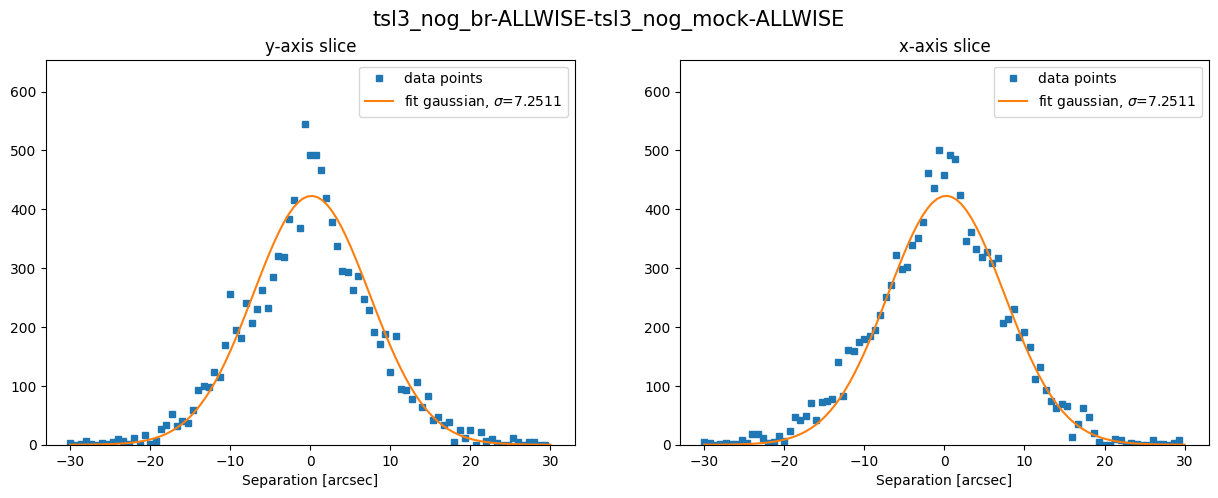

In [20]:
files = '/home/amos/planet_9/CentralDogma/2_Lust_/'

filename = [
    'tsl3_nog_br-2MASS.csv', 'tsl3_nog_br-NOMAD.csv', 'tsl3_nog_br-ALLWISE.csv',
    'tsl3_nog_mock-2MASS.csv', 'tsl3_nog_mock-NOMAD.csv', 'tsl3_nog_mock-ALLWISE.csv',
    'bsc_nog_2MASS.csv', 'bsc_nog_NOMAD.csv', 'bsc_nog_ALLWISE.csv',
    'bsc_nog_mock-2MASS.csv', 'bsc_nog_mock-NOMAD.csv', 'bsc_nog_mock-ALLWISE.csv',
]

num = 2
fnum = num
cnum = num
w = 1
s=0.6

CrossmatchDisfitv2(files+filename[fnum], files+filename[fnum+3], 
                fitrange=30, grid=91, weight=w, scale=s)

5.040779386671095


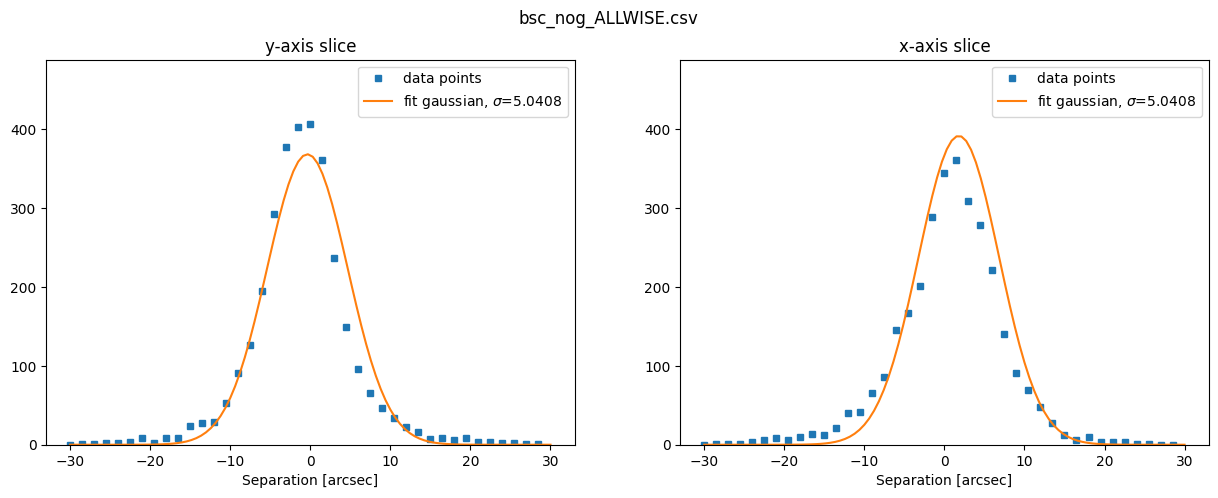

5.040779386671095

In [8]:
cname = ['RAJ2000','DEJ2000']
num = 8
fnum = num
cnum = num
w = 0

CrossmatchDisfit(files+filename[fnum], cname,
                fitrange=30, grid=41, weight=w, mode=3)

### sep test

In [18]:
cname=['RAJ2000','DEJ2000']
cname0=['RA','DEC']

data = tsl_2mass
x = (data[cname0[0]]-data[cname[0]])*3600*np.cos(data[cname0[1]]*np.pi/180)
y = (data[cname0[1]]-data[cname[1]])*3600

tsl_2mass['Dist'] = np.sqrt(x**2 + y**2)